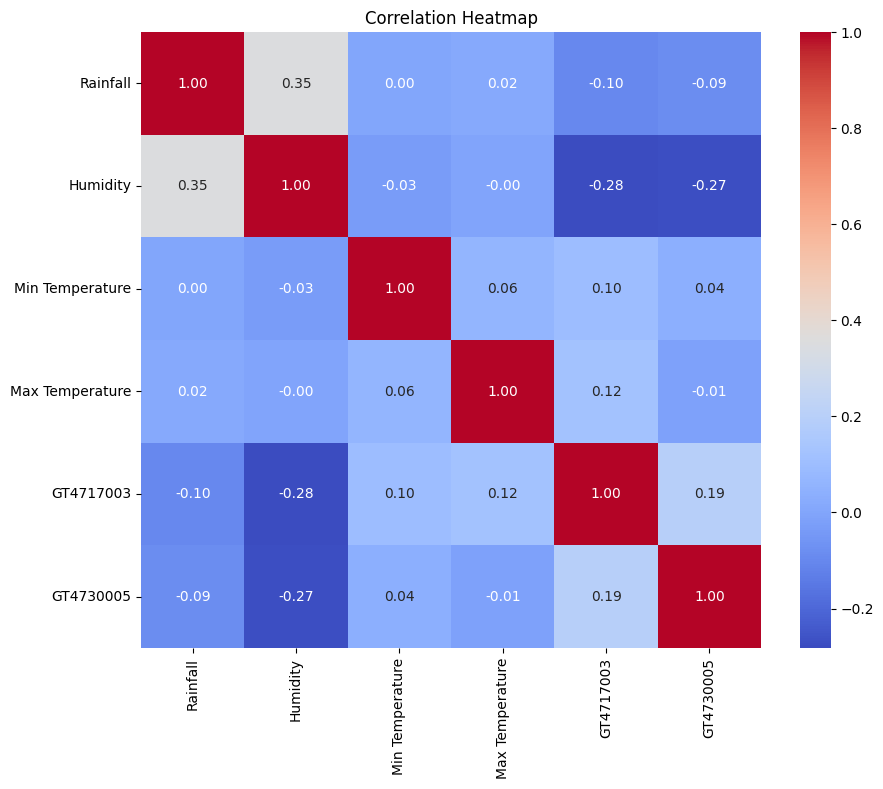

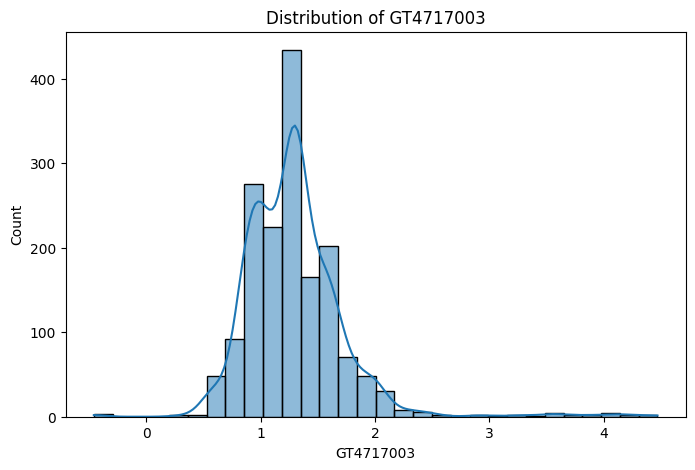

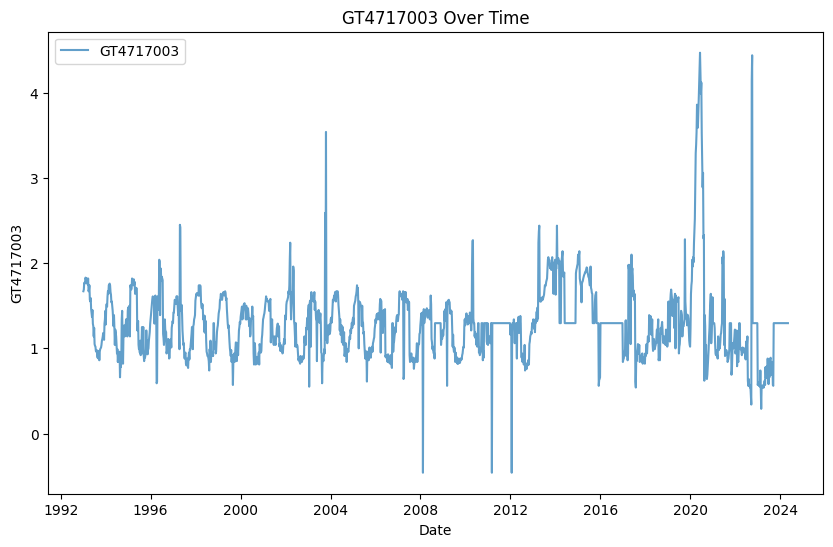

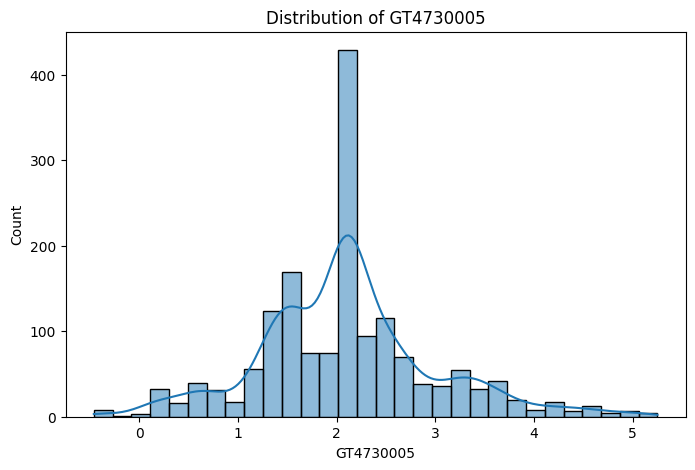

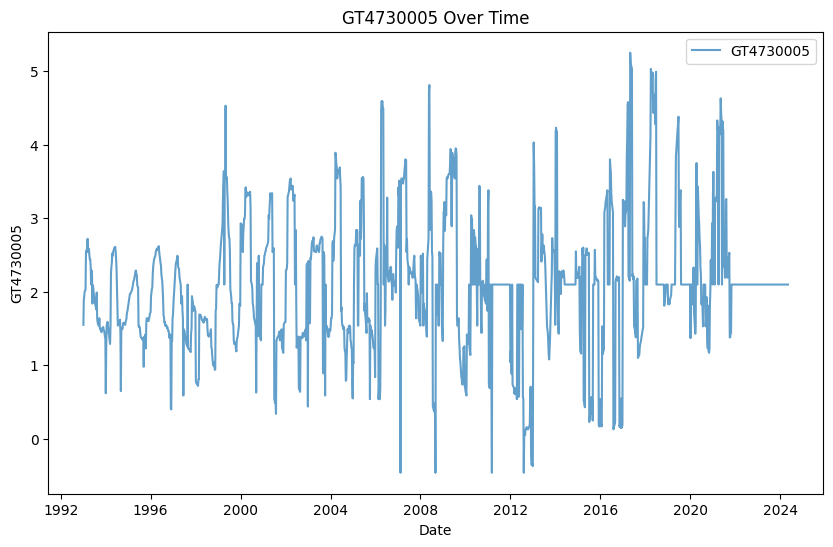

Mean Squared Error: 0.08086696895397648
R-squared: 0.5214603635138761


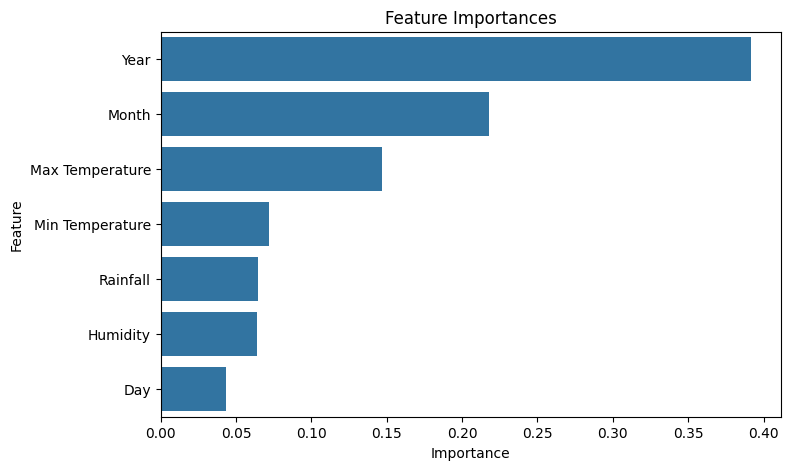

In [ ]:
# Colab Code for EDA and Predictive Modeling

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv('/content/groundwater_data.csv')
# Colab Code for EDA and Predictive Modeling



# Data Cleaning
## Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

## Handle missing values
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
data[num_cols] = imputer.fit_transform(data[num_cols])

# Feature Engineering
## Extract temporal features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Season'] = data['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else \
                                         'Spring' if x in [3, 4, 5] else \
                                         'Summer' if x in [6, 7, 8] else 'Fall')

# Visualization
## Correlation Heatmap
# Exclude non-numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Distribution of Target Variable
plt.figure(figsize=(8, 5))
sns.histplot(data['GT4717003'], kde=True, bins=30)
plt.title('Distribution of GT4717003')
plt.show()

## Trends Over Time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['GT4717003'], label='GT4717003', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('GT4717003')
plt.title('GT4717003 Over Time')
plt.legend()
plt.show()
## Distribution of Target Variable
plt.figure(figsize=(8, 5))
sns.histplot(data['GT4730005'], kde=True, bins=30)
plt.title('Distribution of GT4730005')
plt.show()

## Trends Over Time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['GT4730005'], label='GT4730005', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('GT4730005')
plt.title('GT4730005 Over Time')
plt.legend()
plt.show()

# Data Splitting
features = ['Rainfall', 'Humidity', 'Min Temperature', 'Max Temperature', 'Year', 'Month', 'Day']
X = data[features]
y = data['GT4717003']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(8, 5))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importances')
plt.show()


Checking for missing dates:
Date
7 days    1635
Name: count, dtype: int64


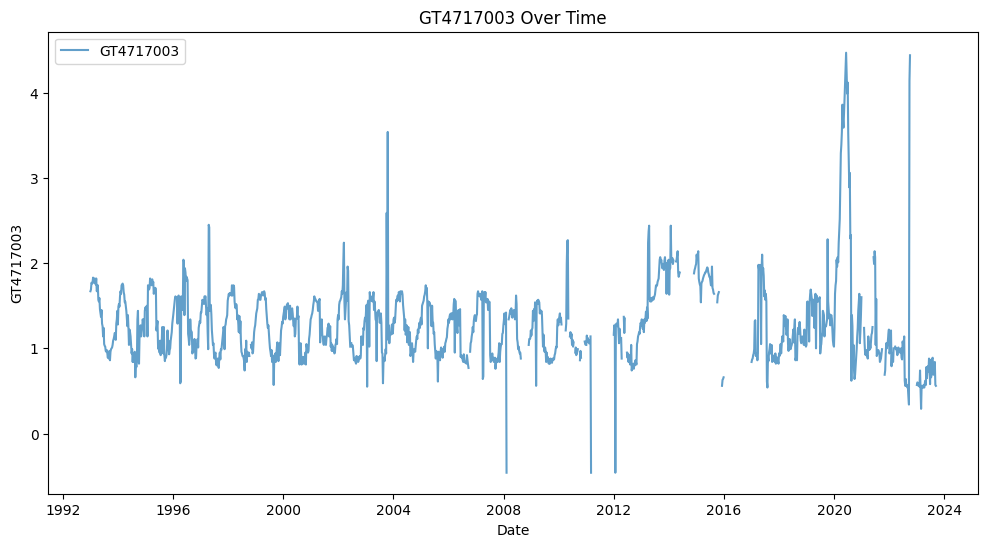


Augmented Dickey-Fuller Test Results:
ADF Statistic: -6.844979270431589
p-value: 1.752162660087294e-09
Critical Values:
	1%: -3.4350700539558847
	5%: -2.8636245613945297
	10%: -2.5678798154000115
The time series is stationary and suitable for time series forecasting.

Augmented Dickey-Fuller Test Results:
ADF Statistic: -9.543096742008041
p-value: 2.6936827593035676e-16
Critical Values:
	1%: -3.4353708501743654
	5%: -2.8637572934525286
	10%: -2.56795049999266
The time series is stationary and suitable for time series forecasting.


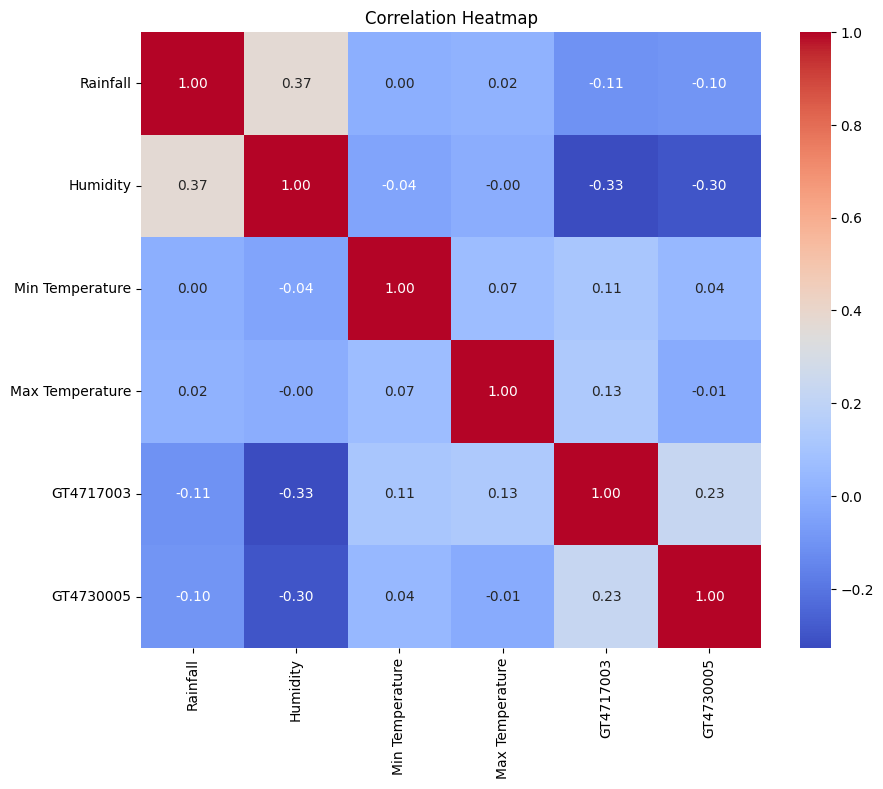

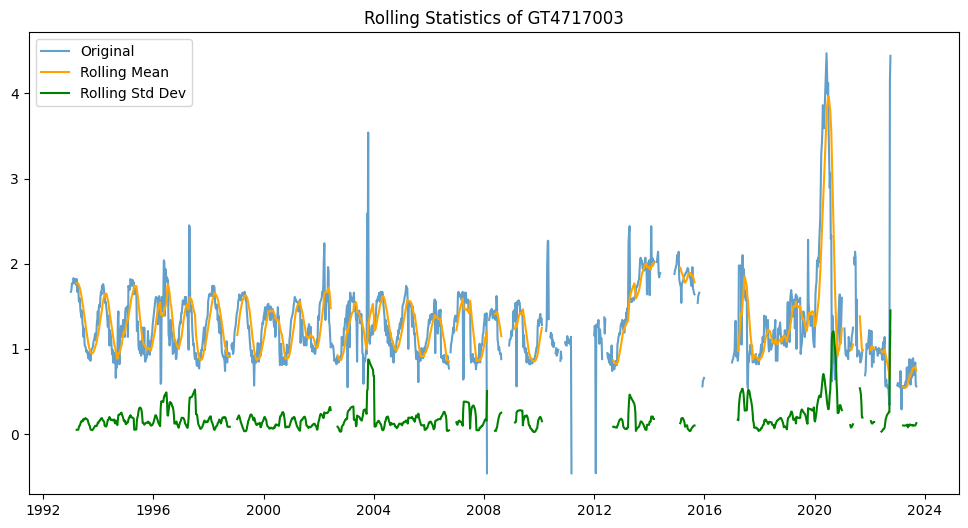

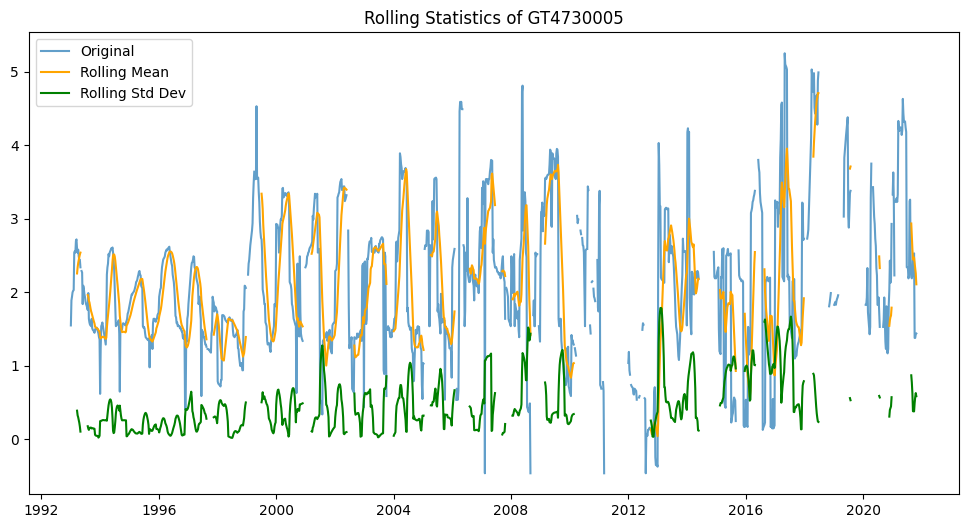


Summary:
1. Check if the time series is stationary using ADF test.
2. If the time series is stationary or made stationary, it is suitable for time series forecasting.
3. High correlations between features and the target variable suggest suitability for regression.
4. Evaluate feature importance and patterns for choosing regression vs time series models.


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
# Load dataset
data = pd.read_csv('/content/groundwater_data.csv')
# Colab Code for EDA and Predictive Modeling
# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data.sort_values(by='Date', inplace=True)

# Check for missing dates and consistency
print("Checking for missing dates:")
print(data['Date'].diff().dropna().value_counts())

# Visualize the target variable over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['GT4717003'], label='GT4717003', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('GT4717003')
plt.title('GT4717003 Over Time')
plt.legend()
plt.show()

# Perform Augmented Dickey-Fuller Test to check stationarity
result = adfuller(data['GT4717003'].dropna())
print("\nAugmented Dickey-Fuller Test Results:")
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value}")

if result[1] < 0.05:
    print("The time series is stationary and suitable for time series forecasting.")
else:
    print("The time series is not stationary. Differencing or other transformations may be required.")
# Perform Augmented Dickey-Fuller Test to check stationarity
result = adfuller(data['GT4730005'].dropna())
print("\nAugmented Dickey-Fuller Test Results:")
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value}")

if result[1] < 0.05:
    print("The time series is stationary and suitable for time series forecasting.")
else:
    print("The time series is not stationary. Differencing or other transformations may be required.")
# Check correlation between features for regression suitability
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Check feature variance over time (optional for time series analysis)
rolling_mean = data['GT4717003'].rolling(window=12).mean()
rolling_std = data['GT4717003'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['GT4717003'], label='Original', alpha=0.7)
plt.plot(data['Date'], rolling_mean, label='Rolling Mean', color='orange')
plt.plot(data['Date'], rolling_std, label='Rolling Std Dev', color='green')
plt.legend()
plt.title('Rolling Statistics of GT4717003')
plt.show()
# Check feature variance over time (optional for time series analysis)
rolling_mean = data['GT4730005'].rolling(window=12).mean()
rolling_std = data['GT4730005'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['GT4730005'], label='Original', alpha=0.7)
plt.plot(data['Date'], rolling_mean, label='Rolling Mean', color='orange')
plt.plot(data['Date'], rolling_std, label='Rolling Std Dev', color='green')
plt.legend()
plt.title('Rolling Statistics of GT4730005')
plt.show()
# Summary and Suitability Assessment
print("\nSummary:")
print("1. Check if the time series is stationary using ADF test.")
print("2. If the time series is stationary or made stationary, it is suitable for time series forecasting.")
print("3. High correlations between features and the target variable suggest suitability for regression.")
print("4. Evaluate feature importance and patterns for choosing regression vs time series models.")

                      Date     Rainfall     Humidity  Min Temperature  \
count                 1636  1627.000000  1479.000000      1461.000000   
mean   2008-09-03 12:00:00     4.919835    80.172105        21.969199   
min    1993-01-03 00:00:00     0.000000    59.714286         9.100000   
25%    2000-11-03 06:00:00     0.000000    75.714286        18.000000   
50%    2008-09-03 12:00:00     1.285714    80.285714        23.800000   
75%    2016-07-04 18:00:00     7.214286    84.857143        26.100000   
max    2024-05-05 00:00:00    66.428571    95.428571        29.400000   
std                    NaN     7.669610     6.399039         4.907711   

       Max Temperature    GT4717003    GT4730005  
count      1636.000000  1397.000000  1306.000000  
mean         31.350367     1.295705     2.098208  
min          15.800000    -0.460000    -0.460000  
25%          29.200000     0.960000     1.440000  
50%          31.600000     1.240000     2.040000  
75%          33.800000     1.550000 

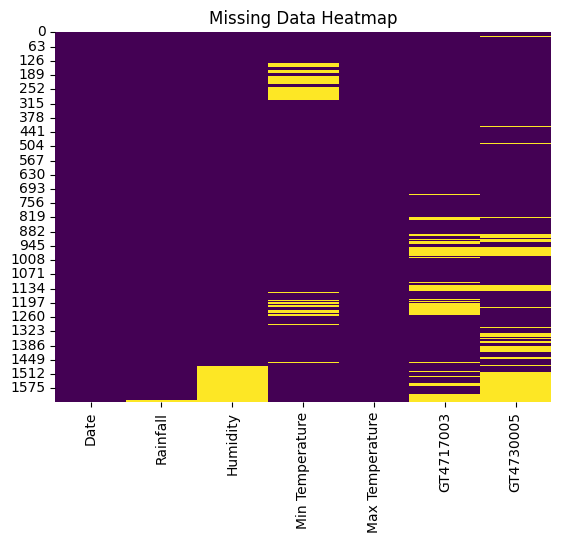

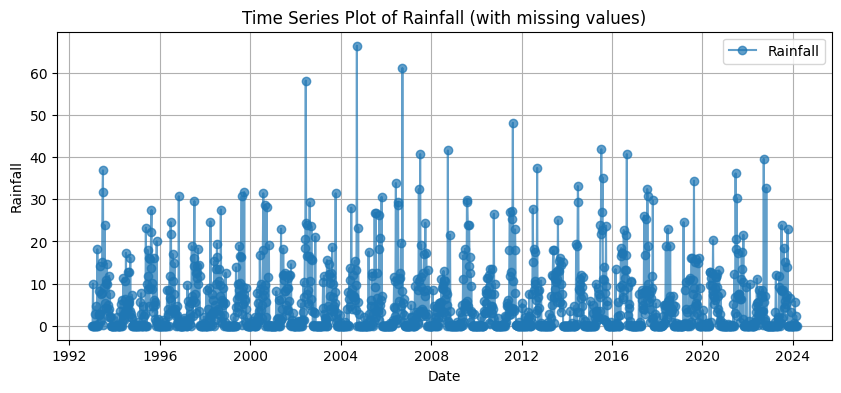

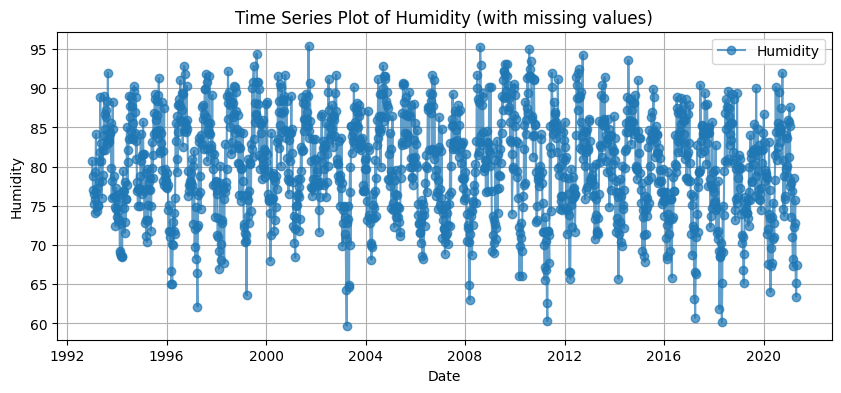

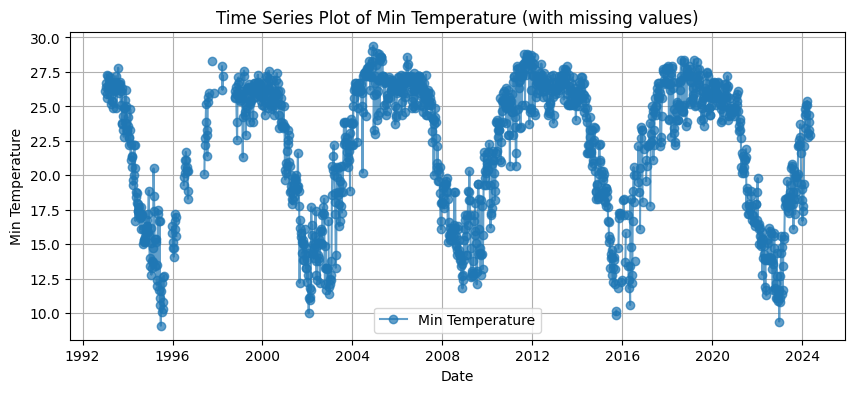

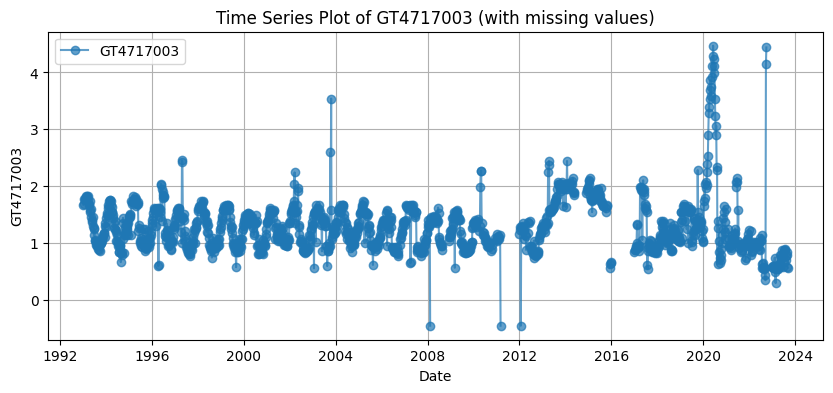

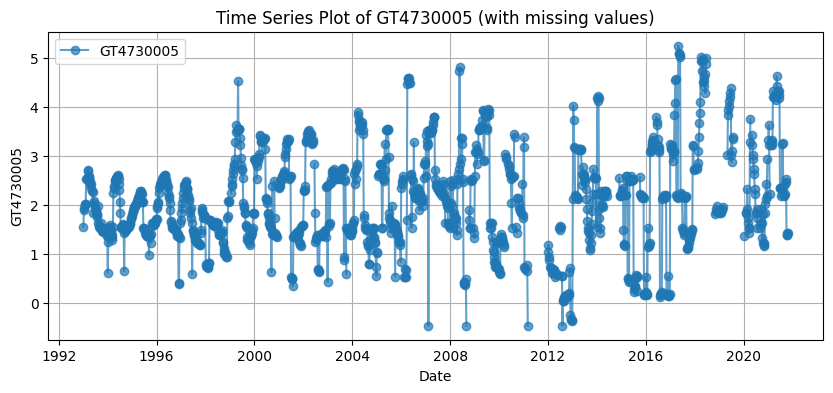


Analysis for Rainfall:
Missing at index 1627 for column Rainfall
Previous value: 0.0
Next value: nan

Missing at index 1628 for column Rainfall
Previous value: nan
Next value: nan

Missing at index 1629 for column Rainfall
Previous value: nan
Next value: nan

Missing at index 1630 for column Rainfall
Previous value: nan
Next value: nan

Missing at index 1631 for column Rainfall
Previous value: nan
Next value: nan


Analysis for Humidity:
Missing at index 1479 for column Humidity
Previous value: 67.4
Next value: nan

Missing at index 1480 for column Humidity
Previous value: nan
Next value: nan

Missing at index 1481 for column Humidity
Previous value: nan
Next value: nan

Missing at index 1482 for column Humidity
Previous value: nan
Next value: nan

Missing at index 1483 for column Humidity
Previous value: nan
Next value: nan


Analysis for Min Temperature:
Missing at index 137 for column Min Temperature
Previous value: 12.7
Next value: nan

Missing at index 138 for column Min Temperat

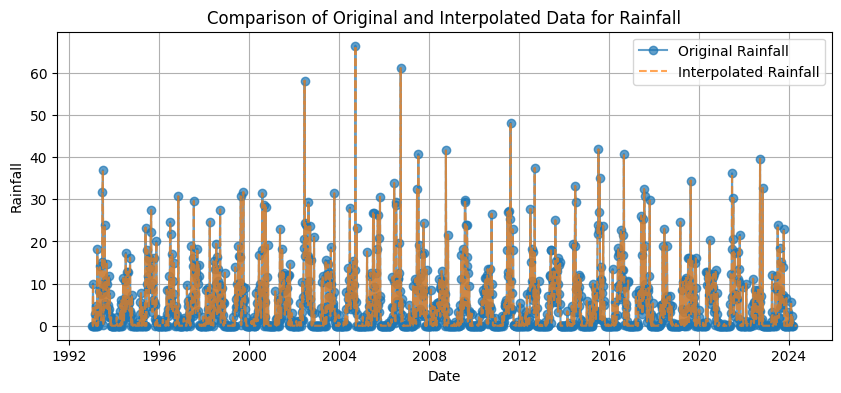

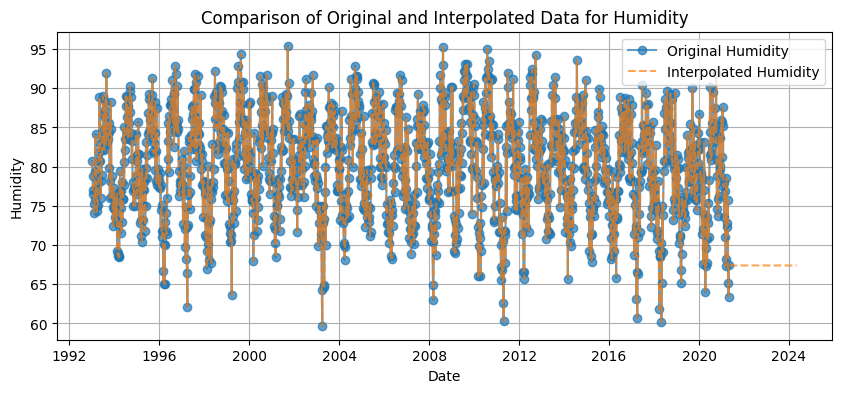

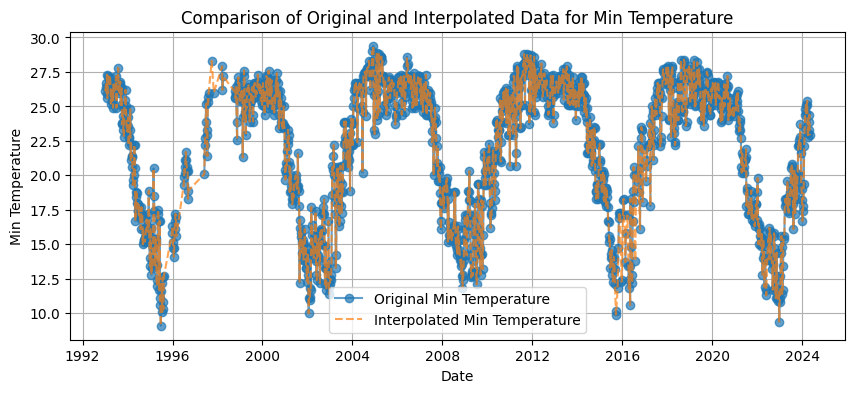

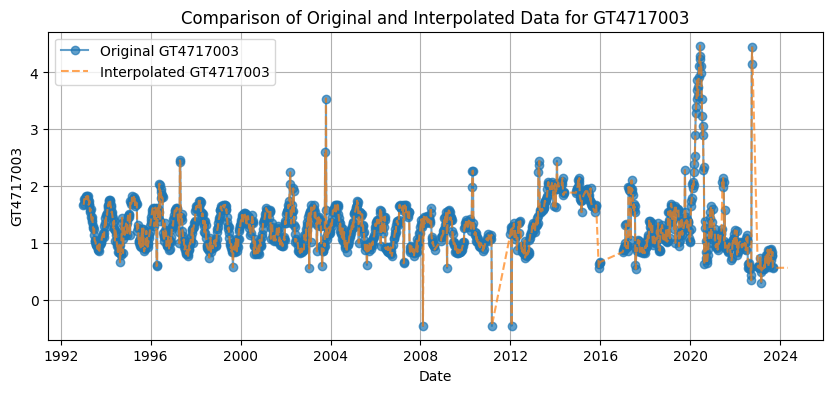

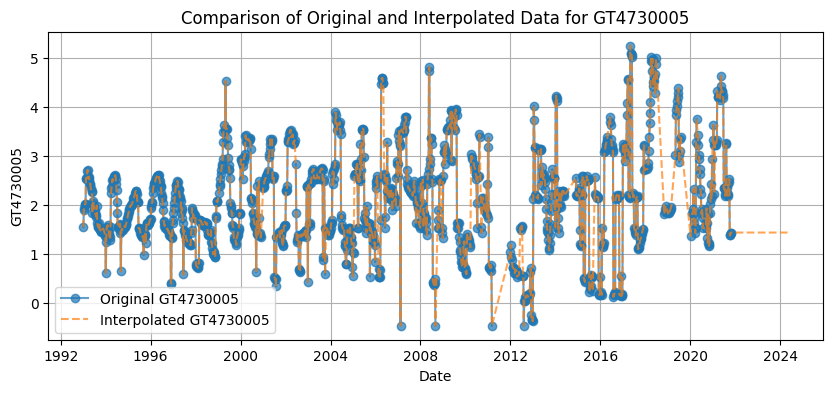

Visual analysis suggests whether interpolation is appropriate based on smoothness and trends.


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('/content/groundwater_data.csv')

# Step 1: Exploratory Data Analysis (EDA)
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualize missing data
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Visualize time series trends for features with missing data
columns_with_missing = ['Rainfall', 'Humidity', 'Min Temperature', 'GT4717003','GT4730005']
for col in columns_with_missing:
    plt.figure(figsize=(10, 4))
    plt.plot(data['Date'], data[col], label=col, marker='o', linestyle='-', alpha=0.7)
    plt.title(f'Time Series Plot of {col} (with missing values)')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.legend()
    plt.grid()
    plt.show()

# Step 2: Test Interpolation Suitability
# Check for linear trends in the data before and after missing values
def check_missing_context(df, col):
    missing_indices = df[df[col].isnull()].index
    for idx in missing_indices[:5]:  # Limit to 5 samples for demonstration
        print(f"Missing at index {idx} for column {col}")
        if idx > 0:
            print(f"Previous value: {df[col].iloc[idx - 1]}")
        if idx < len(df) - 1:
            print(f"Next value: {df[col].iloc[idx + 1]}\n")

for col in columns_with_missing:
    print(f"\nAnalysis for {col}:")
    check_missing_context(data, col)

# Step 3: Visualize Interpolation Impact
# Temporarily fill missing values using linear interpolation
interpolated_data = data.copy()
for col in columns_with_missing:
    interpolated_data[col] = interpolated_data[col].interpolate(method='linear', limit_direction='forward', axis=0)

# Plot before and after interpolation
for col in columns_with_missing:
    plt.figure(figsize=(10, 4))
    plt.plot(data['Date'], data[col], label=f'Original {col}', marker='o', linestyle='-', alpha=0.7)
    plt.plot(interpolated_data['Date'], interpolated_data[col], label=f'Interpolated {col}', marker='', linestyle='--', alpha=0.7)
    plt.title(f'Comparison of Original and Interpolated Data for {col}')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.legend()
    plt.grid()
    plt.show()

# Final Insights
print("Visual analysis suggests whether interpolation is appropriate based on smoothness and trends.")


Remaining missing values after handling:
Date               0
Rainfall           0
Humidity           0
Min Temperature    0
Max Temperature    0
GT4717003          0
GT4730005          0
dtype: int64
                      Date     Rainfall     Humidity  Min Temperature  \
count                 1636  1636.000000  1636.000000      1636.000000   
mean   2008-09-03 12:00:00     4.892770    78.946420        21.840465   
min    1993-01-03 00:00:00     0.000000    59.714286         9.100000   
25%    2000-11-03 06:00:00     0.000000    73.714286        17.875000   
50%    2008-09-03 12:00:00     1.285714    79.428571        23.500000   
75%    2016-07-04 18:00:00     7.142857    84.428571        26.200000   
max    2024-05-05 00:00:00    66.428571    95.428571        29.400000   
std                    NaN     7.657129     7.153786         4.922655   

       Max Temperature    GT4717003    GT4730005  
count      1636.000000  1636.000000  1636.000000  
mean         31.350367     1.251045    

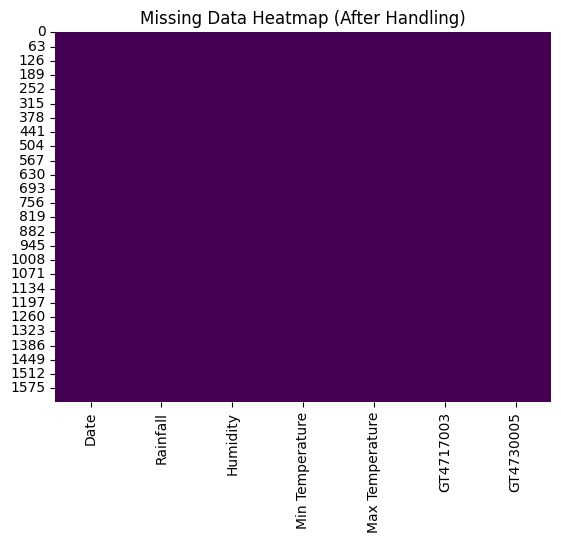

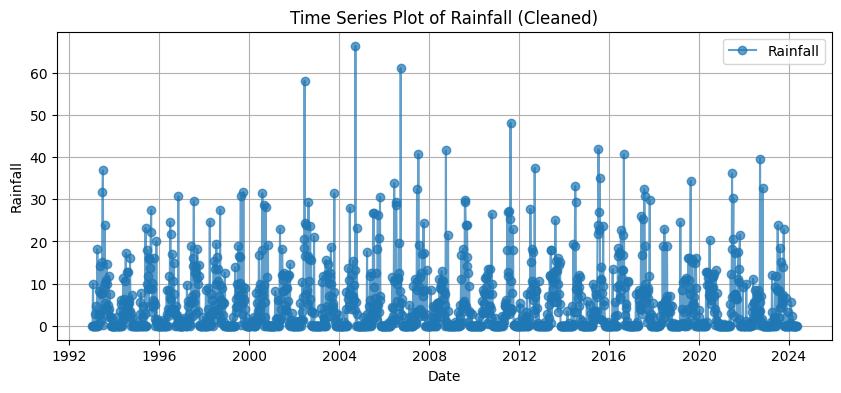

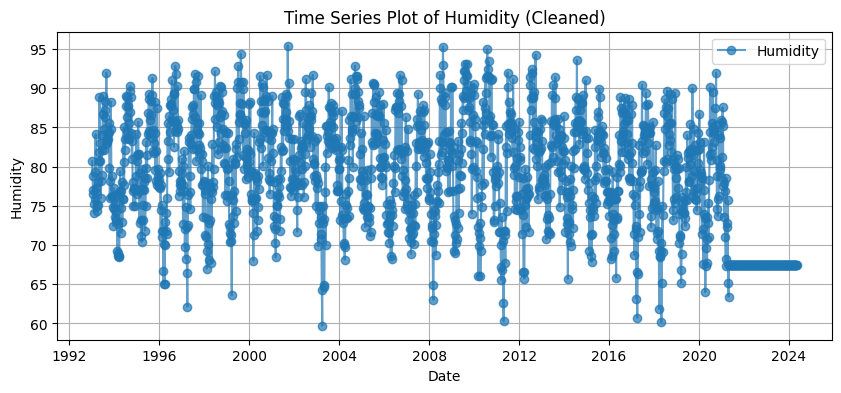

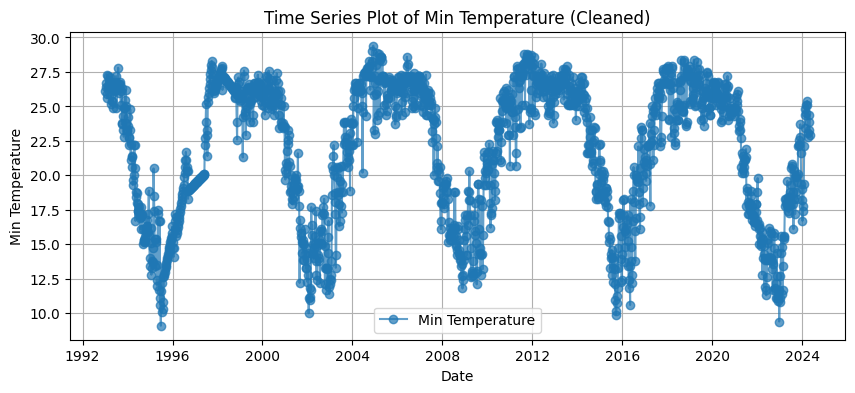

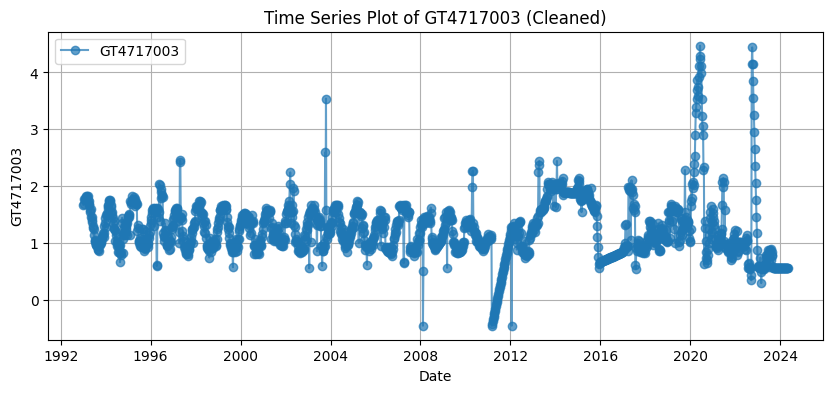

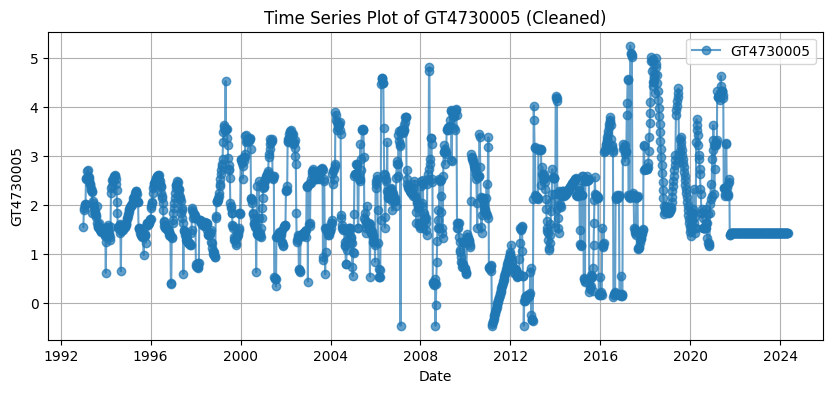

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('/content/groundwater_data.csv')

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Step 1: Handle Missing Data
# Impute missing numeric data with linear interpolation
columns_to_interpolate = ['Rainfall', 'Humidity', 'Min Temperature', 'GT4717003','GT4730005']
for col in columns_to_interpolate:
    data[col] = data[col].interpolate(method='linear', limit_direction='forward', axis=0)

# Drop rows where target column 'GT4717003' is missing
data = data.dropna(subset=['GT4717003'])

# Verify that missing data has been handled
print("Remaining missing values after handling:")
print(data.isnull().sum())

# Step 2: Final EDA for Cleaned Data
# Summary statistics for cleaned data
print(data.describe())

# Visualize the cleaned data to confirm proper handling
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap (After Handling)')
plt.show()

# Time series plots for cleaned data
for col in columns_to_interpolate:
    plt.figure(figsize=(10, 4))
    plt.plot(data['Date'], data[col], label=col, marker='o', linestyle='-', alpha=0.7)
    plt.title(f'Time Series Plot of {col} (Cleaned)')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
refined_file_path = '/content/cleaned_groundwater_data.csv'
data.to_csv(refined_file_path, index=False)

Outlier Analysis Summary:
                 Lower Bound  Upper Bound  Number of Outliers  \
Rainfall          -10.714286    17.857143                92.0   
Humidity           59.428571    99.428571                 0.0   
Min Temperature     5.700000    38.500000                 0.0   
Max Temperature    21.950000    41.550000                 2.0   
GT4717003           0.075000     2.435000                30.0   
GT4730005          -0.345000     4.415000                38.0   

                 Outlier Percentage  Skewness   Kurtosis  
Rainfall                   6.585540  2.516562   9.169835  
Humidity                   0.000000 -0.185779  -0.719402  
Min Temperature            0.000000 -0.603709  -0.956607  
Max Temperature            0.143164 -0.334864  -0.360506  
GT4717003                  2.147459  2.155838  10.210814  
GT4730005                  2.720115  0.513247   0.310685  


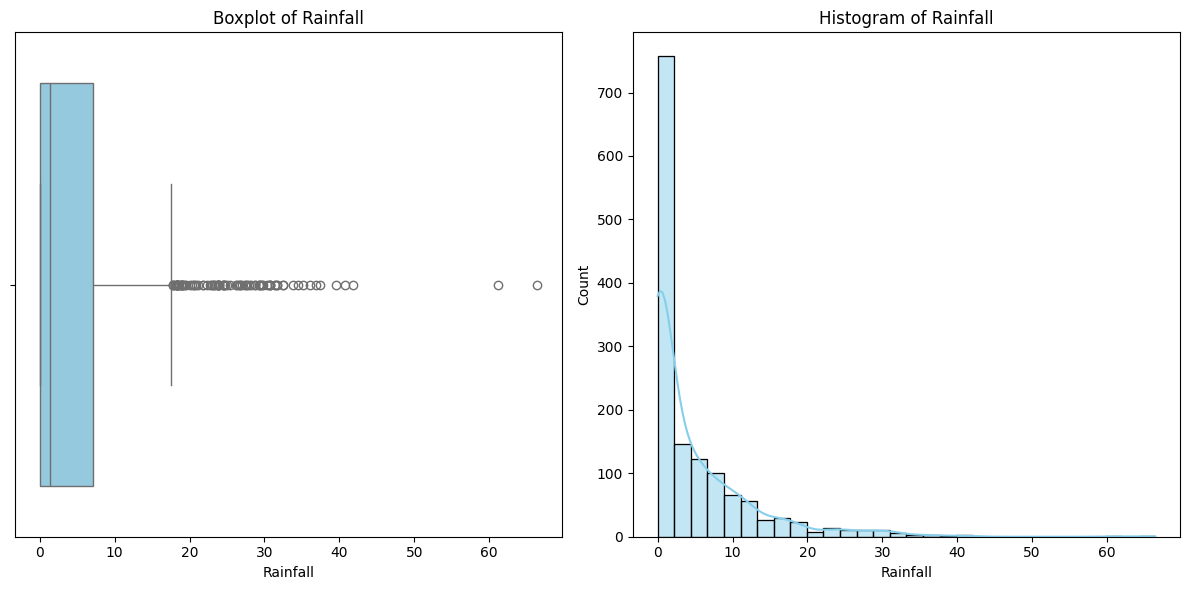

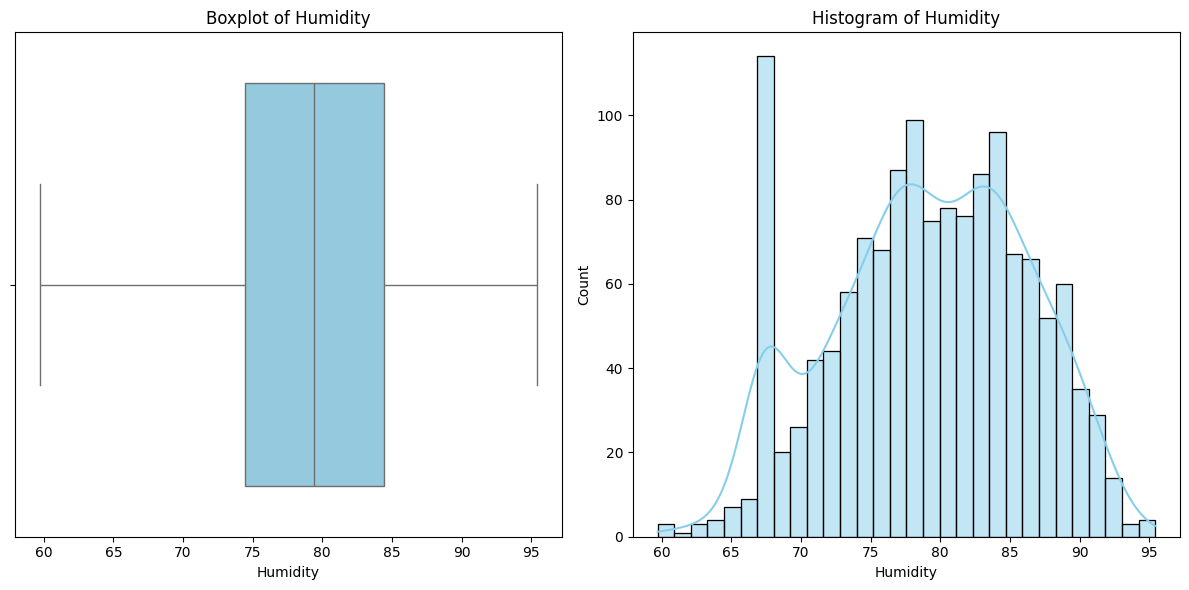

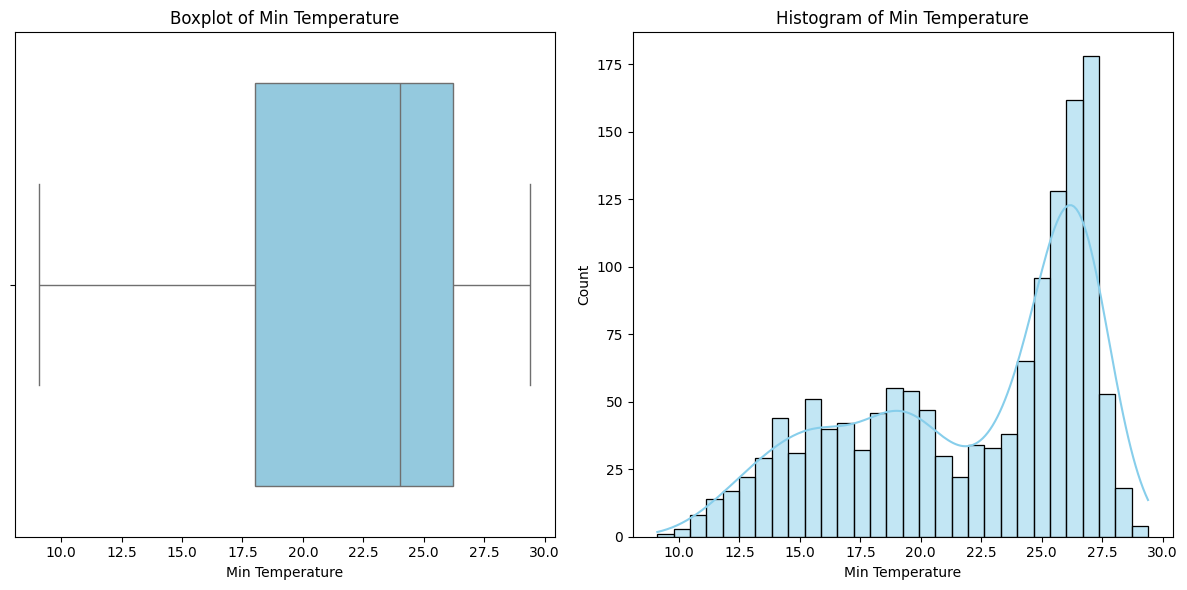

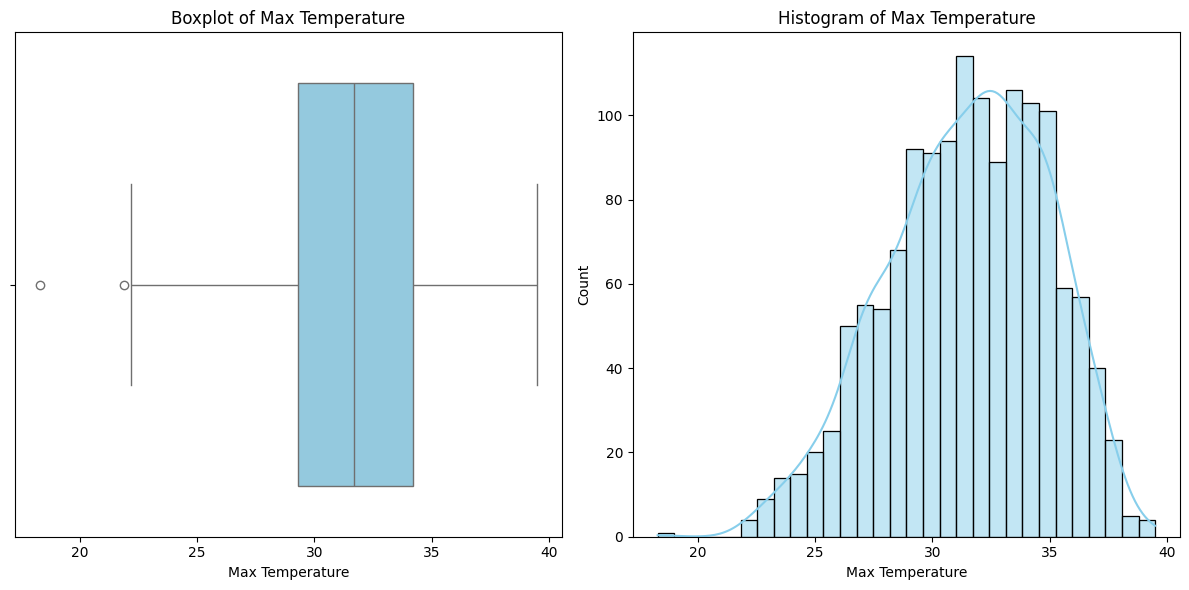

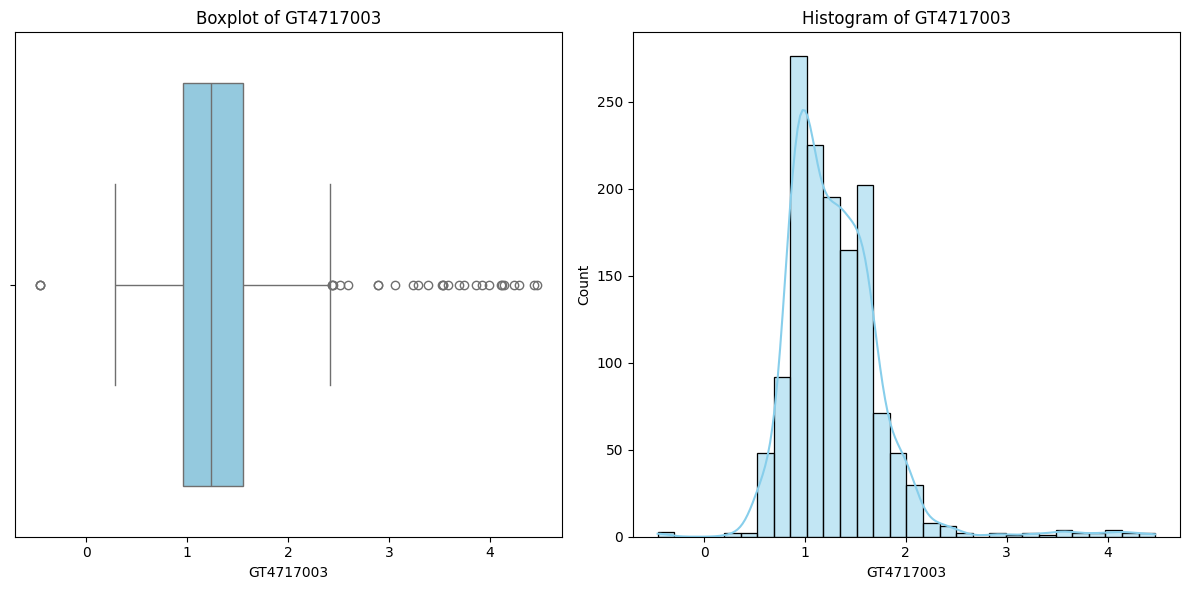

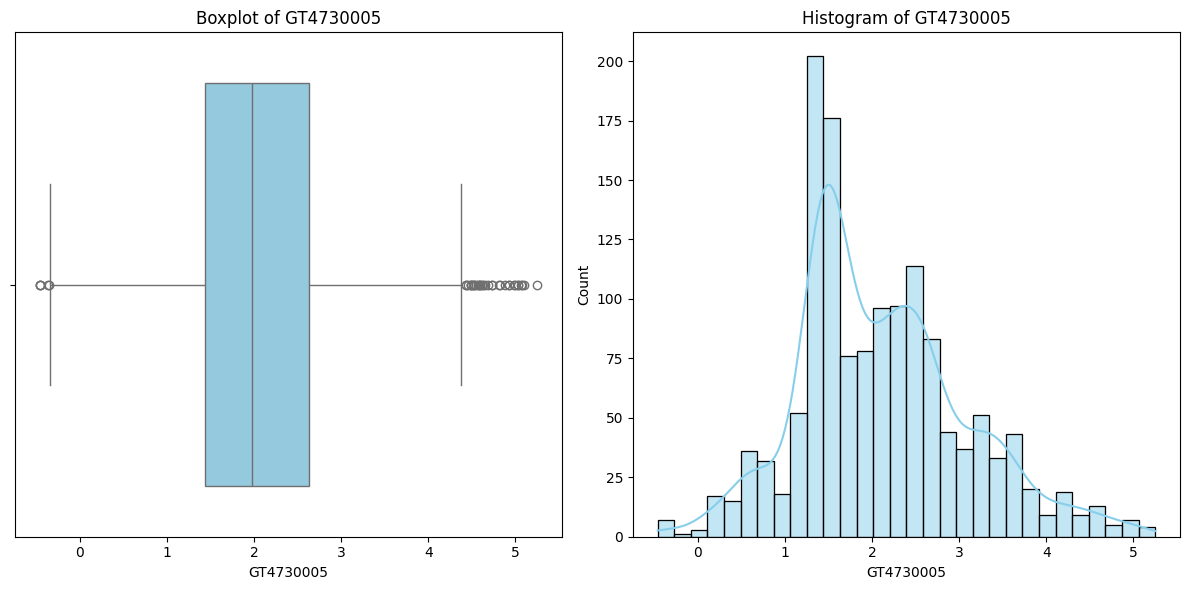

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/cleaned_groundwater_data.csv'  # Update this path
data = pd.read_csv(file_path)

# Identify numerical columns
numerical_columns = ['Rainfall', 'Humidity', 'Min Temperature', 'Max Temperature', 'GT4717003', 'GT4730005']

# Function to detect outliers using the IQR method
def detect_outliers_iqr(df, columns):
    outlier_info = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_info[col] = {
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Number of Outliers': len(outliers),
            'Outlier Percentage': (len(outliers) / len(df)) * 100,
            'Skewness': df[col].skew(),
            'Kurtosis': df[col].kurt()
        }
    return pd.DataFrame(outlier_info).T

# Outlier analysis
outlier_summary = detect_outliers_iqr(data, numerical_columns)

# Display outlier analysis
print("Outlier Analysis Summary:")
print(outlier_summary)

# Visualization of each numerical column
for col in numerical_columns:
    plt.figure(figsize=(12, 6))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=data, x=col, color='skyblue')
    plt.title(f"Boxplot of {col}")

    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(data[col], bins=30, kde=True, color='skyblue')
    plt.title(f"Histogram of {col}")

    plt.tight_layout()
    plt.show()




In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/cleaned_groundwater_data.csv'  # Update this path
data = pd.read_csv(file_path)

# Identify numerical columns
numerical_columns = ['Rainfall', 'Humidity', 'Min Temperature', 'Max Temperature', 'GT4717003', 'GT4730005']

# Log Transformation for highly skewed data
def apply_log_transformation(df, columns):
    for col in columns:
        df[col] = np.log1p(df[col])  # log1p avoids log(0) issues
    return df

# Capping function to limit extreme outliers
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# Apply log transformation
log_columns = ['Rainfall', 'GT4717003']
data = apply_log_transformation(data, log_columns)

# Apply capping
cap_columns = ['Max Temperature', 'GT4730005']
data = cap_outliers(data, cap_columns)

# Save the cleaned dataset
output_path = '/content/outlier_free_data.csv'  # Update this path
data.to_csv(output_path, index=False)

print("\nOutlier handling completed. Cleaned dataset saved.")



Outlier handling completed. Cleaned dataset saved.


Outlier Analysis Summary:
                 Lower Bound  Upper Bound  Number of Outliers  \
Rainfall           -3.145712     5.242853                 0.0   
Humidity           59.428571    99.428571                 0.0   
Min Temperature     5.700000    38.500000                 0.0   
Max Temperature    21.950000    41.550000                 0.0   
GT4717003           0.278221     1.330817                26.0   
GT4730005          -0.345000     4.415000                 0.0   

                 Outlier Percentage  Skewness  Kurtosis  
Rainfall                   0.000000  0.471709 -1.152149  
Humidity                   0.000000 -0.185779 -0.719402  
Min Temperature            0.000000 -0.603709 -0.956607  
Max Temperature            0.000000 -0.313675 -0.450434  
GT4717003                  1.861131  0.008633  7.657280  
GT4730005                  0.000000  0.402582 -0.032248  


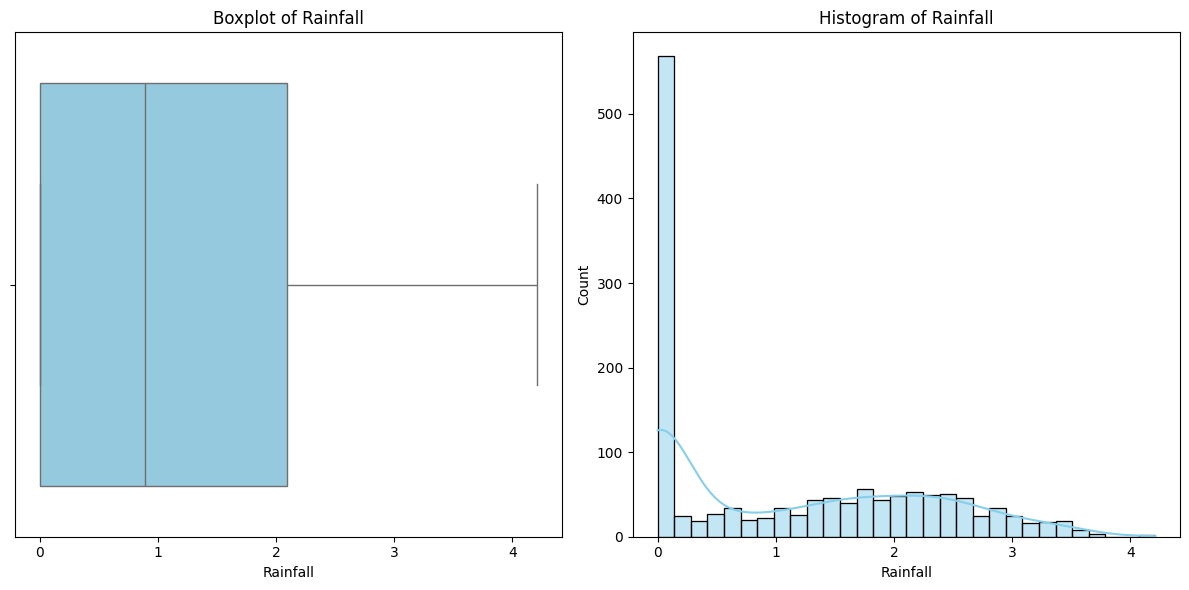

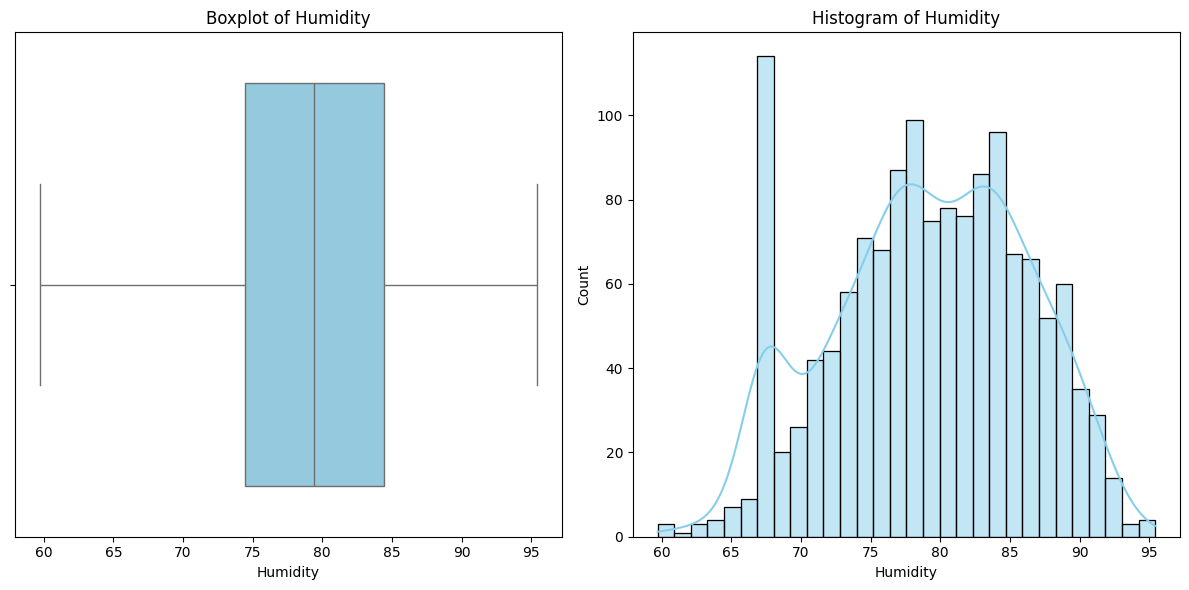

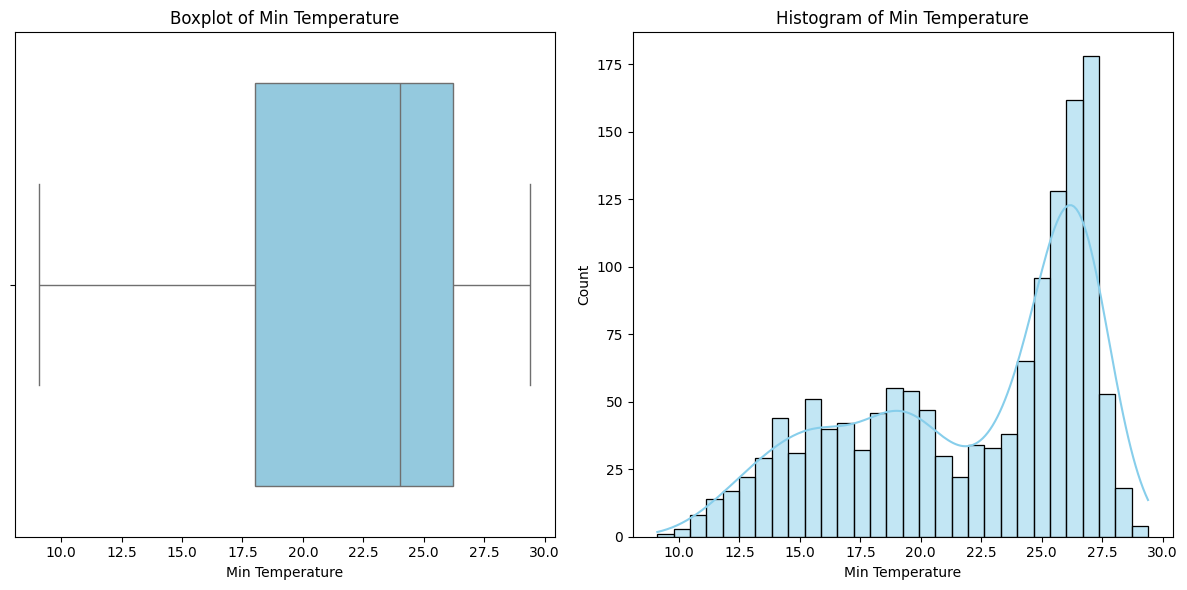

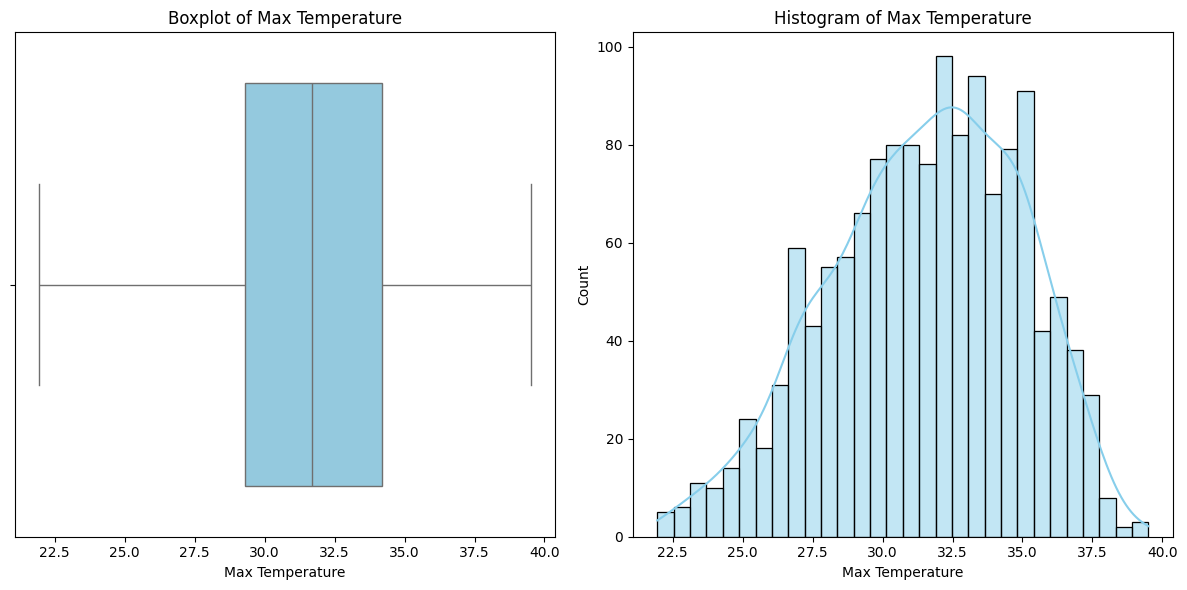

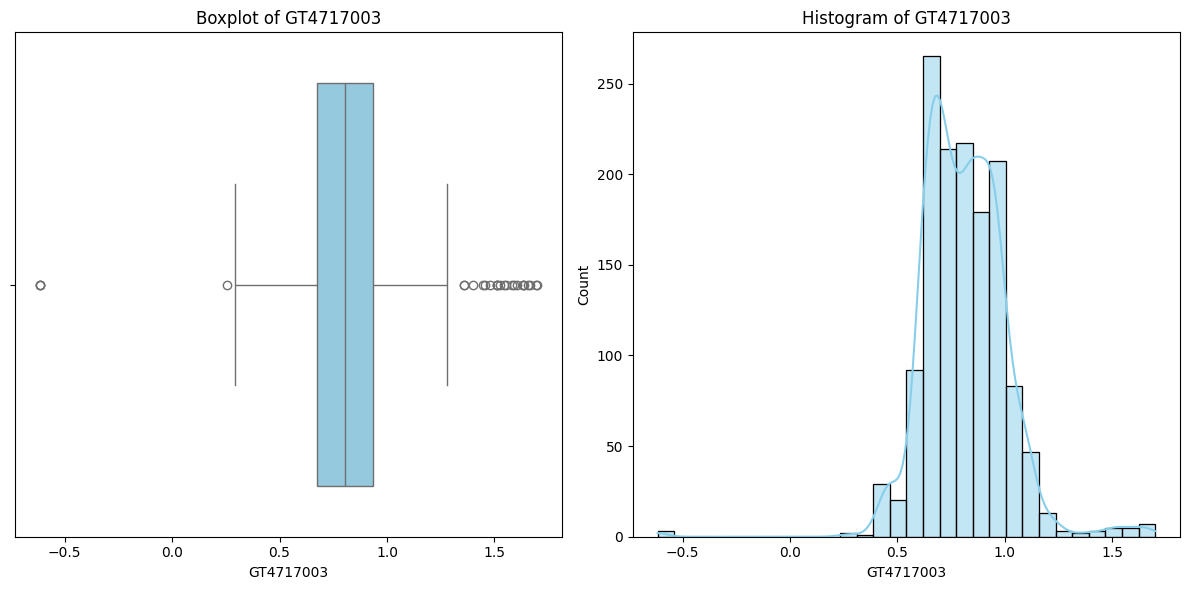

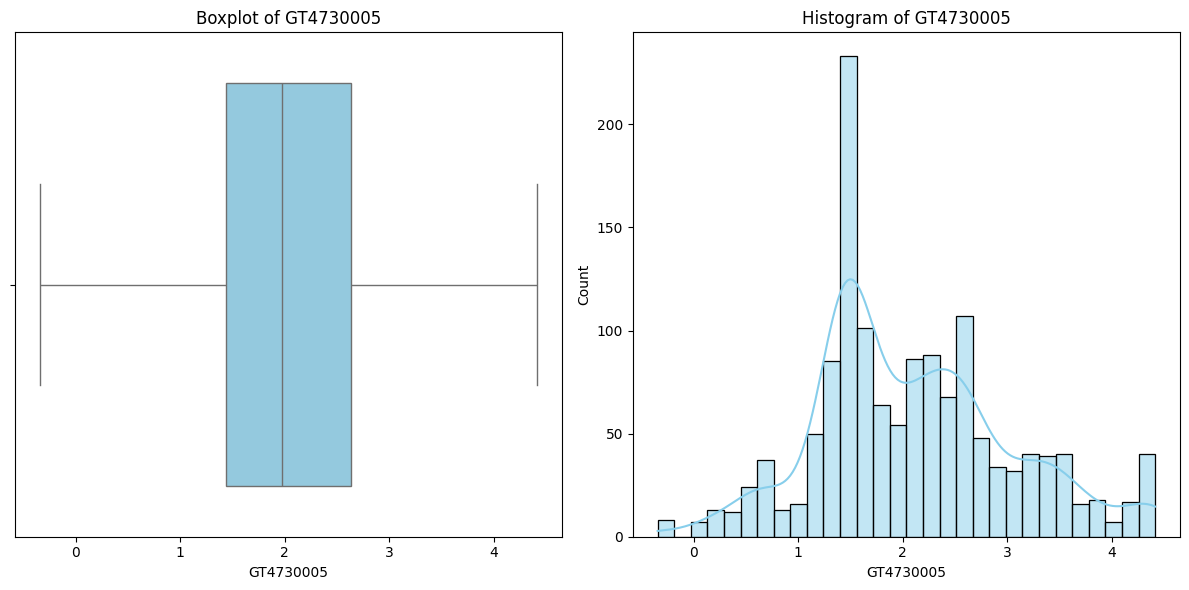

In [ ]:
file_path = '/content/outlier_free_data.csv'  # Update this path
data = pd.read_csv(file_path)
numerical_columns = ['Rainfall', 'Humidity', 'Min Temperature', 'Max Temperature', 'GT4717003', 'GT4730005']

# Function to detect outliers using the IQR method
def detect_outliers_iqr(df, columns):
    outlier_info = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_info[col] = {
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Number of Outliers': len(outliers),
            'Outlier Percentage': (len(outliers) / len(df)) * 100,
            'Skewness': df[col].skew(),
            'Kurtosis': df[col].kurt()
        }
    return pd.DataFrame(outlier_info).T

# Outlier analysis
outlier_summary = detect_outliers_iqr(data, numerical_columns)

# Display outlier analysis
print("Outlier Analysis Summary:")
print(outlier_summary)
# Visualization of each numerical column
for col in numerical_columns:
    plt.figure(figsize=(12, 6))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=data, x=col, color='skyblue')
    plt.title(f"Boxplot of {col}")

    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(data[col], bins=30, kde=True, color='skyblue')
    plt.title(f"Histogram of {col}")

    plt.tight_layout()
    plt.show()

In [ ]:
refined_file_path = '/content/refined_groundwater_data.csv'
data.to_csv(refined_file_path, index=False)

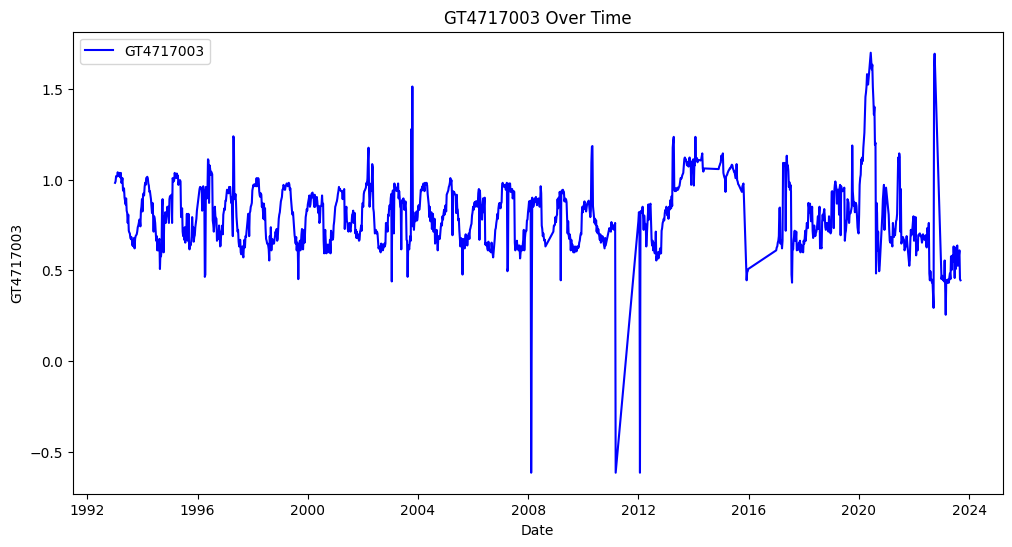

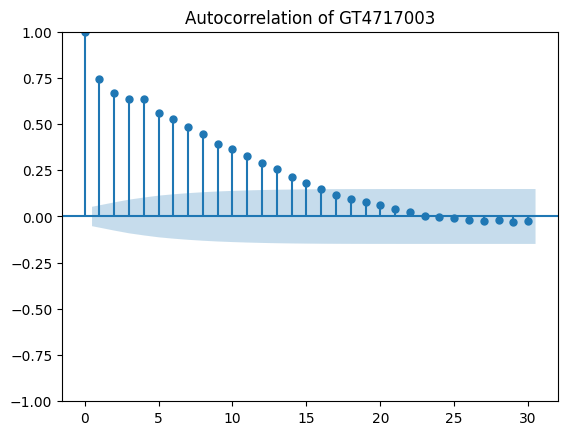

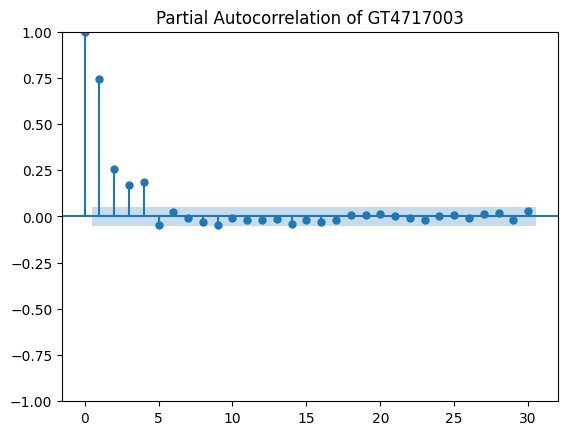

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset
file_path = '/content/outlier_free_data.csv'
data = pd.read_csv(file_path)

# Ensure Date is in datetime format and set as index
data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date", inplace=True)

# Drop GT4730005 as it should not be considered
data = data.drop(columns=["GT4730005"])

# Plot GT4717003 over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["GT4717003"], label="GT4717003", color="blue")
plt.title("GT4717003 Over Time")
plt.xlabel("Date")
plt.ylabel("GT4717003")
plt.legend()
plt.show()

# Plot Autocorrelation and Partial Autocorrelation
plot_acf(data["GT4717003"], lags=30)
plt.title("Autocorrelation of GT4717003")
plt.show()

plot_pacf(data["GT4717003"], lags=30)
plt.title("Partial Autocorrelation of GT4717003")
plt.show()


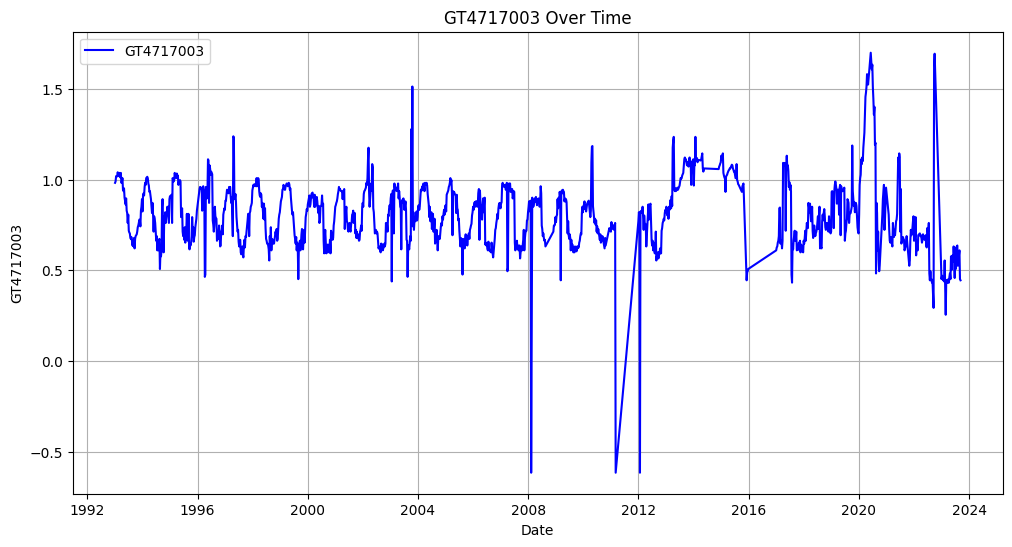

ADF Statistic: -6.77913563655648
p-value: 2.525637750121742e-09
Critical Values: {'1%': -3.435056465447021, '5%': -2.8636185648927617, '10%': -2.567876622097536}

After Differencing:
ADF Statistic: -21.835642682805247
p-value: 0.0
Critical Values: {'1%': -3.4350598552339706, '5%': -2.8636200607815403, '10%': -2.5678774186991347}


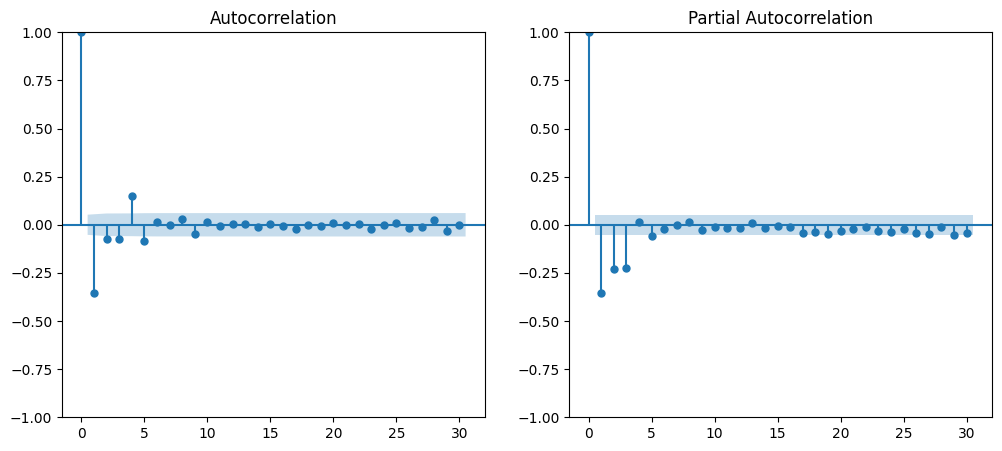

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:              GT4717003   No. Observations:                 1397
Model:               SARIMAX(4, 1, 2)   Log Likelihood               -1275.961
Date:                Tue, 28 Jan 2025   AIC                           2573.922
Time:                        21:13:24   BIC                           2631.545
Sample:                             0   HQIC                          2595.469
                               - 1397                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Rainfall           -0.0786      0.006    -13.976      0.000      -0.090      -0.068
Humidity            0.0015      0.001      1.317      0.188      -0.001       0.004
Min Temperature     0.0467      

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


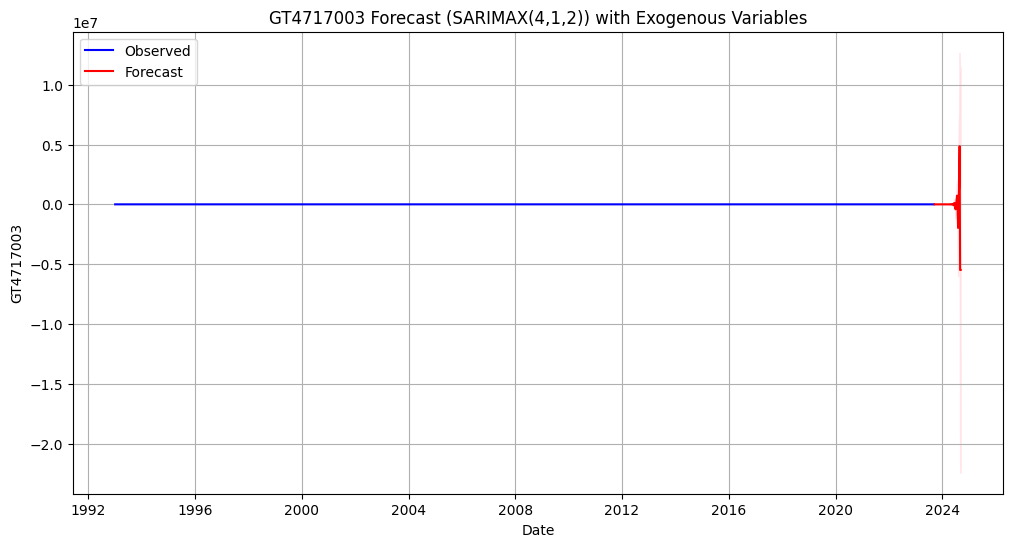

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the dataset
file_path = "/content/outlier_free_data.csv"
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Define the dependent variable (GT4717003) and independent variables (excluding GT4730005)
target_variable = "GT4717003"
exogenous_variables = df.drop(columns=["GT4730005", target_variable]).dropna()

# Extract the target time series
series = df[target_variable].dropna()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(series, color="blue", label=target_variable)
plt.title(f"{target_variable} Over Time")
plt.xlabel("Date")
plt.ylabel(target_variable)
plt.legend()
plt.grid()
plt.show()

# ADF Test for stationarity
adf_test = adfuller(series)
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:", adf_test[4])

# First differencing if needed
series_diff = series.diff().dropna()

# ADF Test on differenced data
adf_test_diff = adfuller(series_diff)
print("\nAfter Differencing:")
print("ADF Statistic:", adf_test_diff[0])
print("p-value:", adf_test_diff[1])
print("Critical Values:", adf_test_diff[4])

# Plot ACF and PACF
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_acf(series_diff, lags=30, ax=plt.gca(), title="Autocorrelation")

plt.subplot(1, 2, 2)
plot_pacf(series_diff, lags=30, ax=plt.gca(), title="Partial Autocorrelation")

plt.show()

# Fit SARIMAX(4,1,2) model with exogenous variables
model = SARIMAX(series, exog=exogenous_variables, order=(4, 1, 2), enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Forecasting future values
forecast_steps = 52  # Forecast next 52 weeks (~1 year)
future_exog = exogenous_variables.iloc[-forecast_steps:].values  # Use last known exogenous values for forecasting
forecast = model_fit.get_forecast(steps=forecast_steps, exog=future_exog)

# Extract forecast mean and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Generate a proper date index for the forecast
forecast_index = pd.date_range(start=series.index[-1], periods=forecast_steps + 1, freq='W')[1:]
forecast_mean.index = forecast_index
forecast_ci.index = forecast_index

# Clean any NaN or infinite values in confidence intervals
forecast_ci = forecast_ci.replace([np.inf, -np.inf], np.nan).dropna()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(series, label="Observed", color="blue")
plt.plot(forecast_mean, label="Forecast", color="red")

# Fill confidence intervals if valid
if not forecast_ci.empty:
    plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="pink", alpha=0.3)

plt.title(f"{target_variable} Forecast (SARIMAX(4,1,2)) with Exogenous Variables")
plt.xlabel("Date")
plt.ylabel(target_variable)
plt.legend()
plt.grid()
plt.show()



In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 32.3 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1836.085, Time=3.81 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3461.892, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1535.080, Time=0.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1955.403, Time=0.88 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1838.045, Time=1.76 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0]             : AIC=884.250, Time=0.94 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1829.676, Time=0.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-1836.157, Time=0.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(0,0,0)[0]             : AIC=379.126, Time=0.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-1837.050, Time=0.42 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-1844.395, Time=0.96 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-1851.367, Time=4.85 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-1838.884, Time=1.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,3)(0,0,0)[0]             : AIC=-1855.430, Time=1.82 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(0,0,0)[0]             : AIC=-1856.473, Time=1.63 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-1854.971, Time=1.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,2)(0,0,0)[0]             : AIC=-1854.832, Time=2.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-1837.902, Time=1.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,1)(0,0,0)[0]             : AIC=-1854.239, Time=4.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,3)(0,0,0)[0]             : AIC=-1853.996, Time=2.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1897.929, Time=2.92 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1872.526, Time=2.90 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1899.750, Time=3.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1875.653, Time=5.95 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1898.187, Time=0.65 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-1897.926, Time=4.23 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1849.728, Time=0.77 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-1898.981, Time=1.75 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-1895.984, Time=5.74 sec

Best model:  ARIMA(4,0,1)(0,0,0)[0] intercept
Total fit time: 58.854 seconds
Optimal ARIMA Order: (4, 0, 1)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:              GT4717003   No. Observations:                 1397
Model:               SARIMAX(4, 0, 1)   Log Likelihood                 933.186
Date:                Tue, 28 Jan 2025   AIC                          -1848.371
Time:                        21:19:33   BIC                          -1801.218
Sample:                             0   HQIC                         -1830.740
                               - 1397                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Rainfall           -0.0064      0.005     -1.393      0.164      -0.015       0.003
Min Temperature     0.0007      0.003      0.267      0.790      -0.004       0.006
Max Temperature    -0.0007      

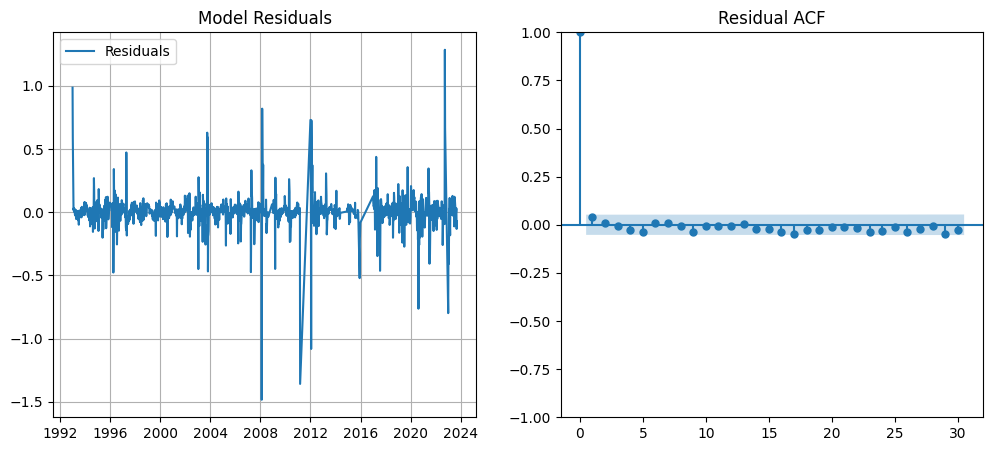

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


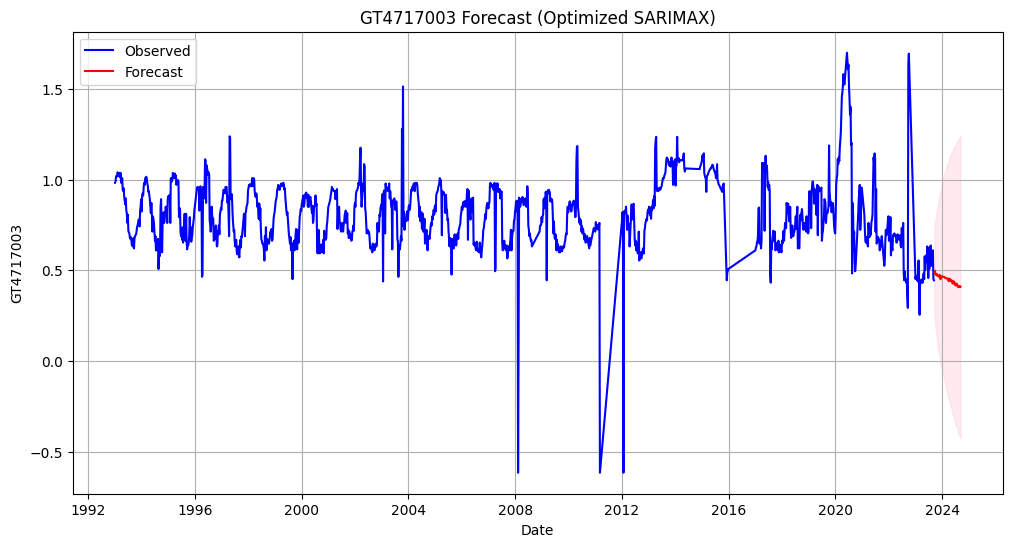

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

# Load dataset
file_path = "/content/outlier_free_data.csv"
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Define target variable (GT4717003) and exogenous variables (excluding GT4730005 and Humidity)
target_variable = "GT4717003"
exogenous_variables = df.drop(columns=["GT4730005", "Humidity", target_variable]).dropna()

# Extract the target time series
series = df[target_variable].dropna()

# Automatic ARIMA Order Selection
optimal_arima = auto_arima(series, exogenous=exogenous_variables, seasonal=False, stepwise=True, trace=True)
best_order = optimal_arima.order
print("Optimal ARIMA Order:", best_order)

# Fit SARIMAX model with optimized parameters
model = SARIMAX(series, exog=exogenous_variables, order=best_order, enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Residual Analysis - Ensure residuals are white noise
residuals = model_fit.resid
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(residuals, label="Residuals")
plt.title("Model Residuals")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plot_acf(residuals, lags=30, ax=plt.gca(), title="Residual ACF")
plt.show()

# Forecasting future values
forecast_steps = 52  # Forecast next 52 weeks (~1 year)
future_exog = exogenous_variables.iloc[-forecast_steps:].values  # Use last known exogenous values
forecast = model_fit.get_forecast(steps=forecast_steps, exog=future_exog)

# Extract forecast mean and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Generate a proper date index for the forecast
forecast_index = pd.date_range(start=series.index[-1], periods=forecast_steps + 1, freq='W')[1:]
forecast_mean.index = forecast_index
forecast_ci.index = forecast_index

# Clean any NaN or infinite values in confidence intervals
forecast_ci = forecast_ci.replace([np.inf, -np.inf], np.nan).dropna()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(series, label="Observed", color="blue")
plt.plot(forecast_mean, label="Forecast", color="red")

# Fill confidence intervals if valid
if not forecast_ci.empty:
    plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="pink", alpha=0.3)

plt.title(f"{target_variable} Forecast (Optimized SARIMAX)")
plt.xlabel("Date")
plt.ylabel(target_variable)
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "/content/outlier_free_data.csv"
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Define target variable (GT4717003) and exogenous variables (excluding GT4730005 and insignificant variables)
target_variable = "GT4717003"
exogenous_variables = df.drop(columns=["GT4730005", "Humidity", "Rainfall","Min Temperature", "Max Temperature", target_variable]).dropna()

# Extract target time series
series = df[target_variable].dropna()

# 🔹 Train the model using data **until 2021**
train = series[:'2021']
train_exog = exogenous_variables.loc[:'2021']

# 🔹 Use 2022+ data for forecasting comparison
test = series['2022':]
test_exog = exogenous_variables.loc['2022':]

# ✅ Automatic ARIMA Order Selection (Testing Differencing `d`)
optimal_arima = auto_arima(train, exogenous=train_exog, seasonal=False, stepwise=True, trace=True, d=None)
best_order = optimal_arima.order
print("🔹 Optimal ARIMA Order:", best_order)

# ✅ Fit SARIMAX model with optimized parameters
model = SARIMAX(train, exog=train_exog, order=best_order, enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# 🔮 Forecasting from 2022 onwards
forecast = model_fit.get_forecast(steps=len(test), exog=test_exog)

# Extract forecast mean and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Ensure forecast index matches test data
forecast_mean.index = test.index
forecast_ci.index = test.index

# 🎯 Model Performance Evaluation
mae = mean_absolute_error(test, forecast_mean)
rmse = np.sqrt(mean_squared_error(test, forecast_mean))
mape = np.mean(np.abs((test - forecast_mean) / test)) * 100
r2 = r2_score(test, forecast_mean)  # R² Score

print("\n📊 Updated Model Performance Metrics:")
print(f"✅ Mean Absolute Error (MAE): {mae:.4f}")
print(f"✅ Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"✅ Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"✅ R² Score: {r2:.4f} (Closer to 1 means better fit)")

# 📈 Visualization: Original vs Forecast (2022+)
plt.figure(figsize=(14, 6))
plt.plot(series, label="Original Data (Full)", color="blue")
plt.plot(forecast_mean, label="Forecasted Data (2022+)", color="red", linestyle="dashed")
plt.fill_between(test.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="pink", alpha=0.3)

# Markers for where forecast starts
plt.axvline(train.index[-1], color="black", linestyle="dotted", label="Forecast Start (2022)")

plt.title(f"{target_variable} - Improved ARIMA Forecast (2022+)")
plt.xlabel("Date")
plt.ylabel(target_variable)
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1893.408, Time=1.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3308.662, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1576.216, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1883.134, Time=0.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1889.861, Time=0.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-1889.895, Time=0.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-1895.018, Time=4.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-1888.775, Time=0.86 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(0,0,0)[0]             : AIC=-1915.213, Time=1.66 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-1917.094, Time=0.55 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,1)(0,0,0)[0]             : AIC=-1915.092, Time=1.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.32 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=inf, Time=0.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,2)(0,0,0)[0]             : AIC=-1913.245, Time=1.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1959.699, Time=2.44 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1928.550, Time=5.44 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1955.399, Time=0.88 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-1958.474, Time=2.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1958.359, Time=2.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1910.699, Time=0.56 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1933.572, Time=3.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-1960.616, Time=5.20 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0] intercept
Total fit time: 35.837 seconds
🔹 Optimal ARIMA Order: (5, 0, 0)


ValueError: zero-size array to reduction operation maximum which has no identity

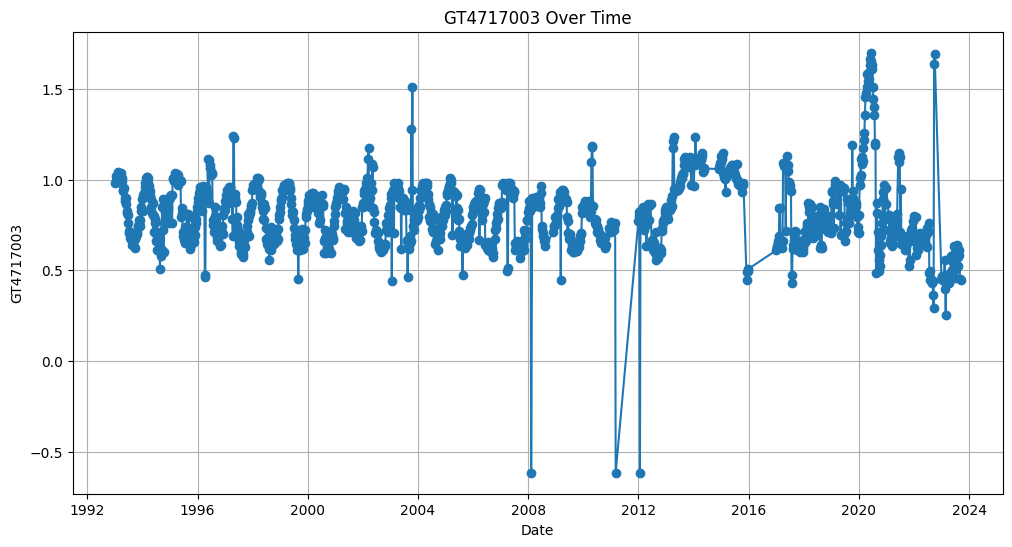

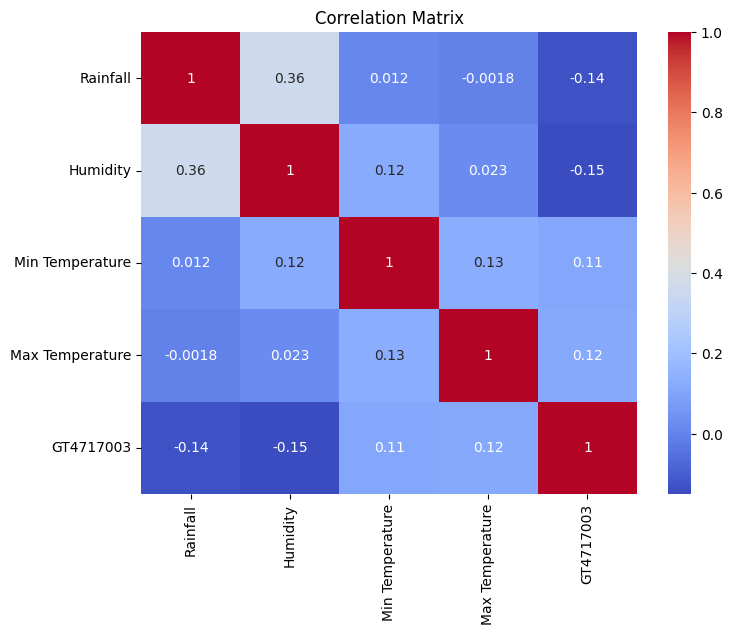

ADF Statistic: -6.779135637676379
p-value: 2.525637734448725e-09
Critial Values:
   1%, -3.435056465447021
Critial Values:
   5%, -2.8636185648927617
Critial Values:
   10%, -2.567876622097536


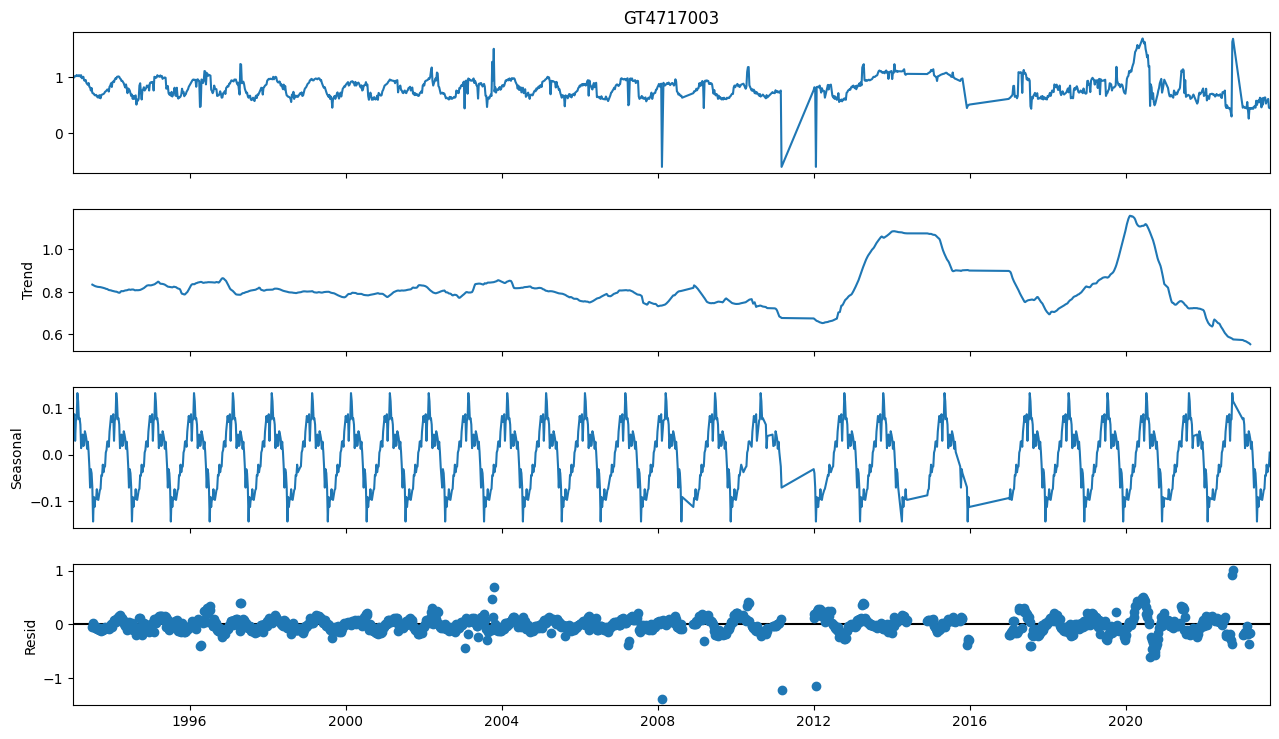

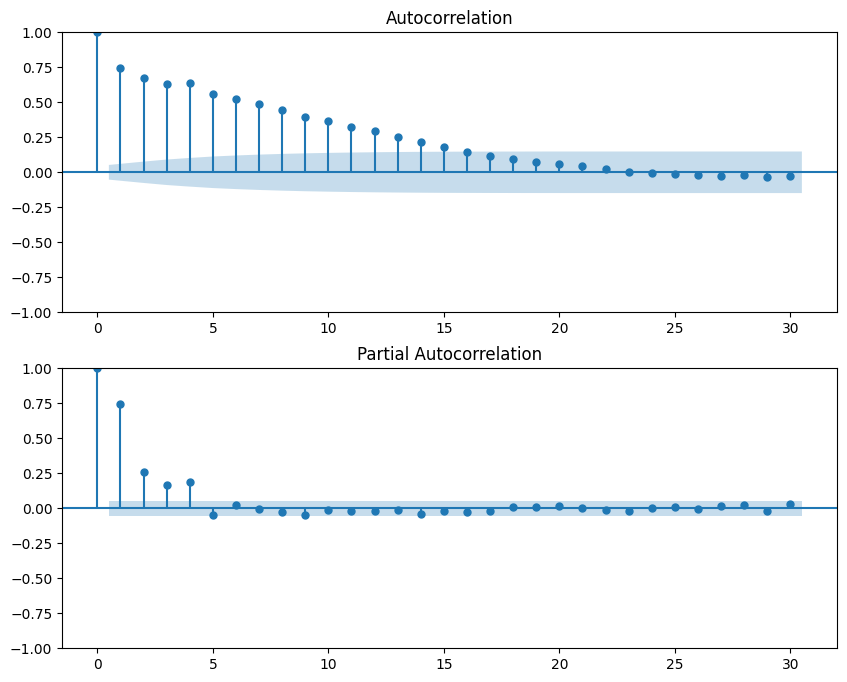

KPSS Test on GT4717003:
KPSS Statistic: 0.0861695883428809
p-value: 0.1
Num Lags: 20
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739


<ipython-input-8-c3bce3fe67e8>:71: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(timeseries, regression='c', nlags="auto")


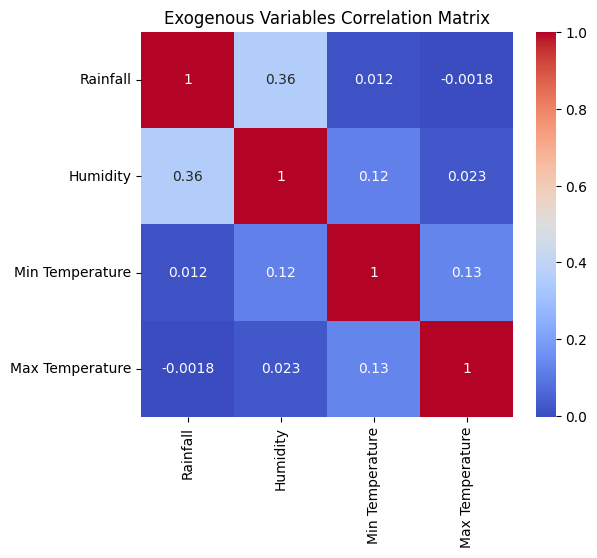

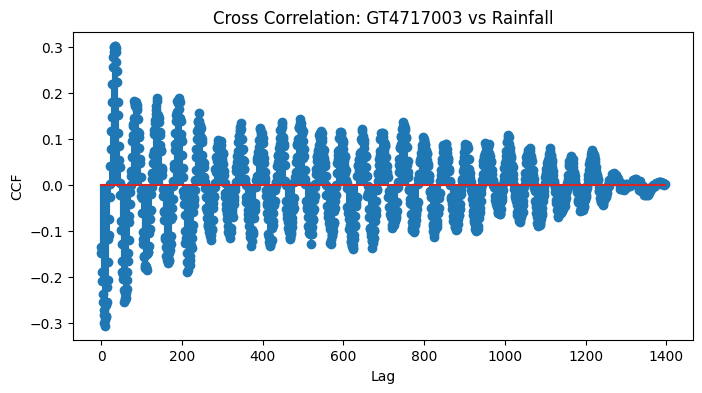

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# For ARIMA and related models
import statsmodels.api as sm
from pmdarima import auto_arima

# For ML
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# For Prophet (optional)
from prophet import Prophet

df = pd.read_csv("/content/outlier_free_data_GT4717003.csv", parse_dates=['Date'])
# Now set the Date as the index
df.set_index('Date', inplace=True)

df = df.astype({
    'Rainfall': float,
    'Humidity': float,
    'Min Temperature': float,
    'Max Temperature': float,
    'GT4717003': float
})
# Plot the target variable over time
plt.figure(figsize=(12,6))
plt.plot(df.index, df['GT4717003'], marker='o')
plt.title('GT4717003 Over Time')
plt.xlabel('Date')
plt.ylabel('GT4717003')
plt.grid(True)
plt.show()
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['GT4717003'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
import statsmodels.api as sm

# Because your data is weekly, set a frequency if possible (df.index.freq = 'W'),
# or at least treat it as ~1 period per week for decomposition.
# Let’s do an additive decomposition:
decomposition = sm.tsa.seasonal_decompose(df['GT4717003'], period=52, model='additive')
# period=52 assumes weekly data with ~52 weeks per year

fig = decomposition.plot()
fig.set_size_inches(14, 8)
plt.show()
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(10,8))
plot_acf(df['GT4717003'], ax=ax[0], lags=30)
plot_pacf(df['GT4717003'], ax=ax[1], lags=30)
plt.show()
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    statistic, p_value, n_lags, critical_values = kpss(timeseries, regression='c', nlags="auto")
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'Num Lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')

print("KPSS Test on GT4717003:")
kpss_test(df['GT4717003'].dropna())
import seaborn as sns

corr_matrix = df[['Rainfall','Humidity','Min Temperature','Max Temperature']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Exogenous Variables Correlation Matrix')
plt.show()
# Example: Cross-correlation of Rainfall with GT4717003
from statsmodels.tsa.stattools import ccf

ccf_values = ccf(df['GT4717003'], df['Rainfall'], adjusted=False)  # default is raw cross-correlation
plt.figure(figsize=(8,4))
plt.stem(range(len(ccf_values)), ccf_values)
plt.title("Cross Correlation: GT4717003 vs Rainfall")
plt.xlabel("Lag")
plt.ylabel("CCF")
plt.show()
# A pseudo-code example (not a full snippet):
from sklearn.model_selection import TimeSeriesSplit



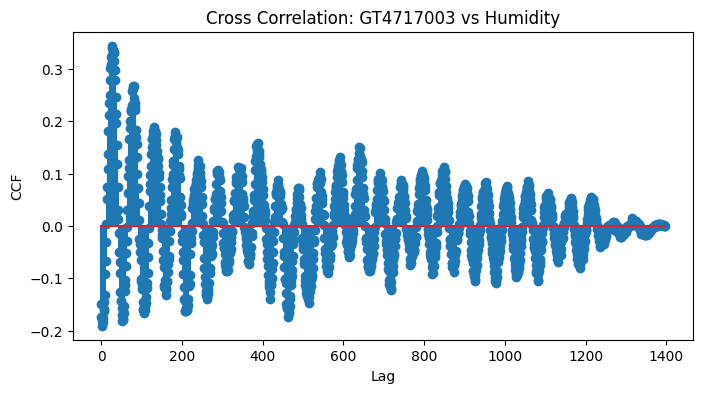

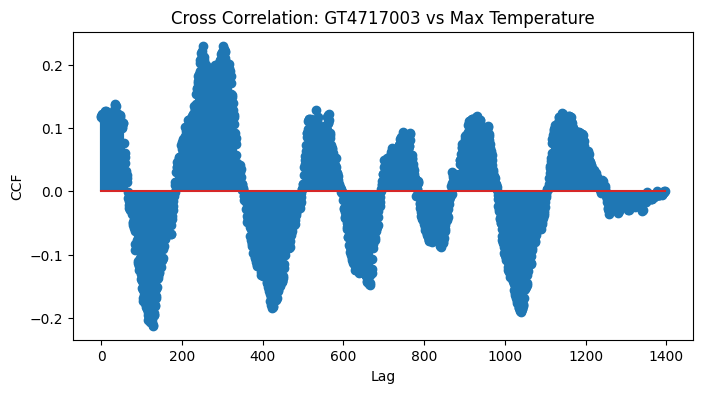

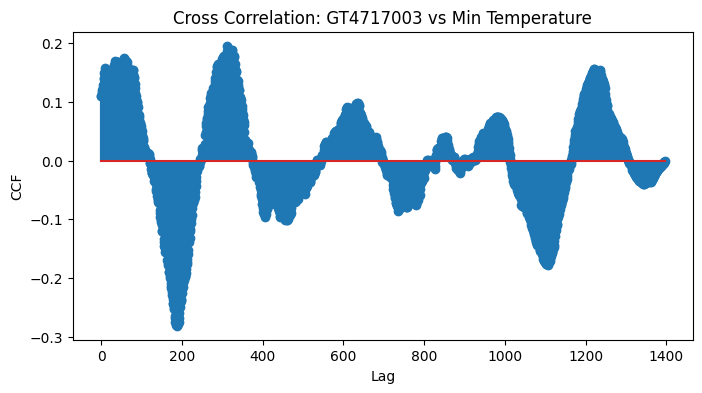

In [ ]:
ccf_values = ccf(df['GT4717003'], df['Humidity'], adjusted=False)  # default is raw cross-correlation
plt.figure(figsize=(8,4))
plt.stem(range(len(ccf_values)), ccf_values)
plt.title("Cross Correlation: GT4717003 vs Humidity")
plt.xlabel("Lag")
plt.ylabel("CCF")
plt.show()
ccf_values = ccf(df['GT4717003'], df['Max Temperature'], adjusted=False)  # default is raw cross-correlation
plt.figure(figsize=(8,4))
plt.stem(range(len(ccf_values)), ccf_values)
plt.title("Cross Correlation: GT4717003 vs Max Temperature")
plt.xlabel("Lag")
plt.ylabel("CCF")
plt.show()
ccf_values = ccf(df['GT4717003'], df['Min Temperature'], adjusted=False)  # default is raw cross-correlation
plt.figure(figsize=(8,4))
plt.stem(range(len(ccf_values)), ccf_values)
plt.title("Cross Correlation: GT4717003 vs Min Temperature")
plt.xlabel("Lag")
plt.ylabel("CCF")
plt.show()

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.3 MB/s eta 0:00:00


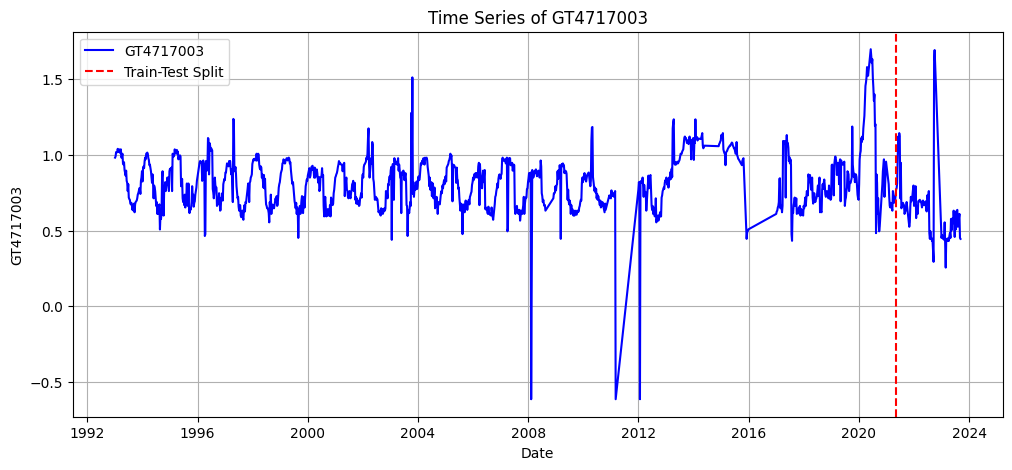

ADF Statistic: -6.491646247699709
p-value: 1.2224648979147954e-08
The series is stationary.


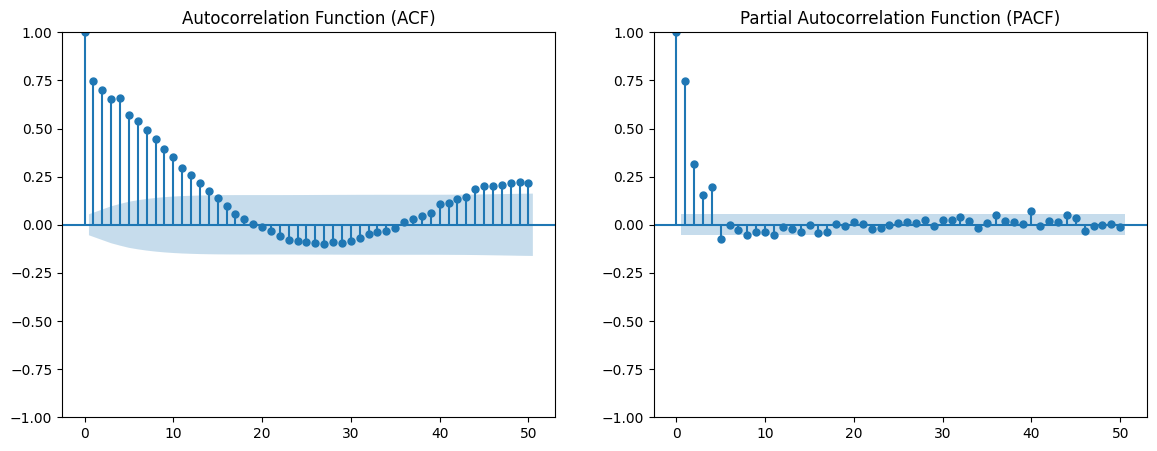

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<

Missing values in forecast: Forecast    104
dtype: int64
Final length of test set: 104
Final length of forecast: 104


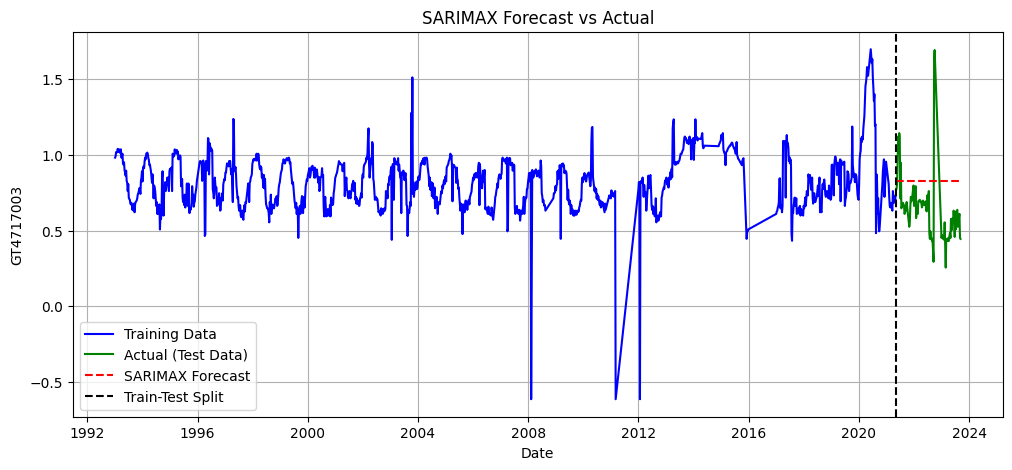

MAE: 0.2484
RMSE: 0.2870
MAPE: 46.06%
R²: -0.7950


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "/content/outlier_free_data_GT4717003.csv"  # Upload your file in Colab

# Read the CSV file
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Split data (Last 2 years as test set)
test_period = 2 * 52  # Approx. 104 weeks assuming weekly data
train_df = df.iloc[:-test_period]
test_df = df.iloc[-test_period:]

# Plot the target variable
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["GT4717003"], label="GT4717003", color="blue")
plt.axvline(test_df.index[0], color="red", linestyle="dashed", label="Train-Test Split")
plt.xlabel("Date")
plt.ylabel("GT4717003")
plt.title("Time Series of GT4717003")
plt.legend()
plt.grid()
plt.show()

# Augmented Dickey-Fuller Test
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] < 0.05:
        print("The series is stationary.")
    else:
        print("The series is NOT stationary.")

adf_test(train_df["GT4717003"])

# ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(train_df["GT4717003"], lags=50, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")
plot_pacf(train_df["GT4717003"], lags=50, ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")
plt.show()

# Train a simplified SARIMAX model
model = SARIMAX(train_df["GT4717003"], order=(1,0,0), seasonal_order=(1,0,0,52))
sarimax_results = model.fit(disp=False)

# Forecast
forecast = sarimax_results.forecast(steps=len(test_df))
forecast_df = pd.DataFrame(forecast, index=test_df.index, columns=["Forecast"])

# Handle NaN values in forecast
print("Missing values in forecast:", forecast_df.isna().sum())
forecast_df["Forecast"].fillna(train_df["GT4717003"].mean(), inplace=True)

# Ensure test set and forecast have the same length
test_df = test_df.iloc[:len(forecast_df)]

# Check final lengths
print("Final length of test set:", len(test_df))
print("Final length of forecast:", len(forecast_df))

# Re-run visualization and performance metrics
plt.figure(figsize=(12, 5))
plt.plot(train_df.index, train_df["GT4717003"], label="Training Data", color="blue")
plt.plot(test_df.index, test_df["GT4717003"], label="Actual (Test Data)", color="green")
plt.plot(forecast_df.index, forecast_df["Forecast"], label="SARIMAX Forecast", color="red", linestyle="dashed")
plt.axvline(test_df.index[0], color="black", linestyle="dashed", label="Train-Test Split")
plt.xlabel("Date")
plt.ylabel("GT4717003")
plt.title("SARIMAX Forecast vs Actual")
plt.legend()
plt.grid()
plt.show()

# Performance Metrics
mae = mean_absolute_error(test_df["GT4717003"], forecast_df["Forecast"])
rmse = np.sqrt(mean_squared_error(test_df["GT4717003"], forecast_df["Forecast"]))
mape = np.mean(np.abs((test_df["GT4717003"] - forecast_df["Forecast"]) / test_df["GT4717003"])) * 100
r2 = r2_score(test_df["GT4717003"], forecast_df["Forecast"])  # Calculate R²
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.4f}")

In [ ]:
!pip install --upgrade xgboost scikit-learn


In [ ]:
# Upgrade scikit-learn and XGBoost
!pip install --upgrade scikit-learn xgboost


Data shape after fill & drop: (1397, 5)


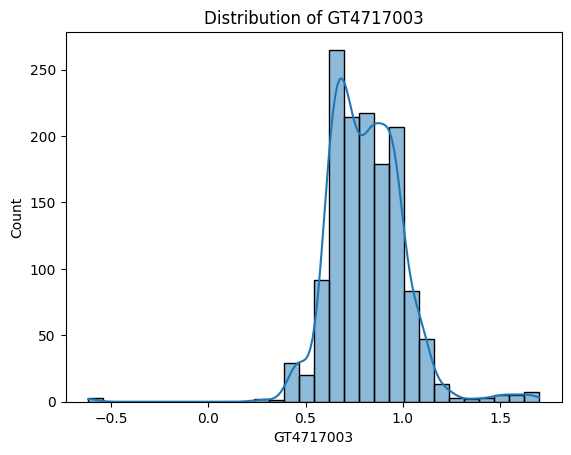

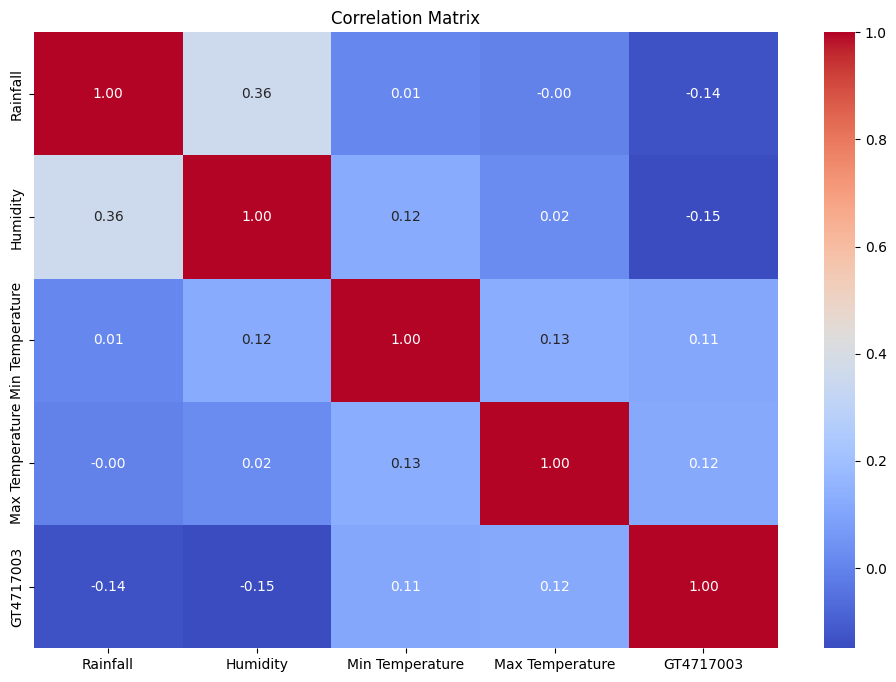

Shape after creating lag and rolling features: (1384, 21)
Train shape: (1309, 21)
Test shape: (75, 21)

--- Baseline Model ---
Baseline => RMSE=0.2125, MAE=0.1294, R2=0.0000


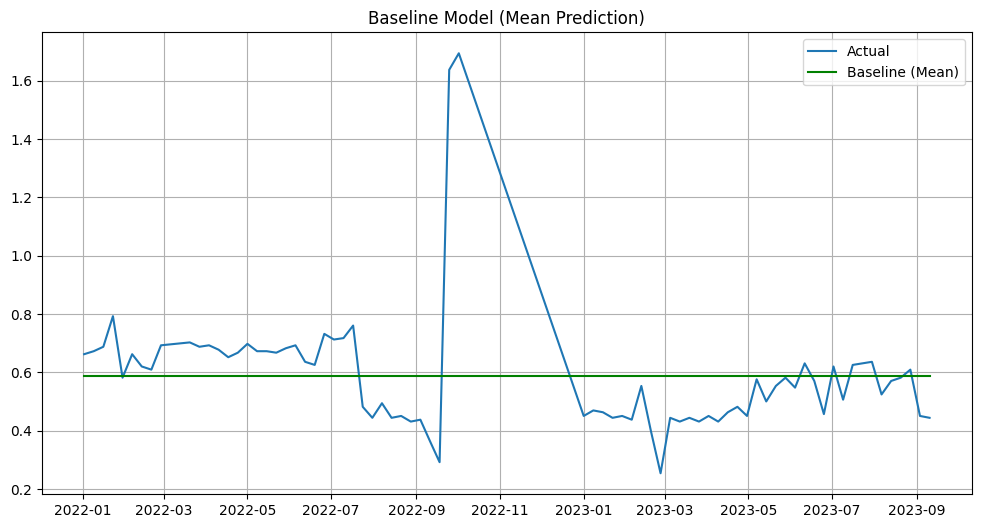


--- RandomForest with Hyperparameter Tuning ---
Best parameters for RandomForest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
RandomForest (Tuned) => RMSE=0.1883, MAE=0.1047, R2=0.2147


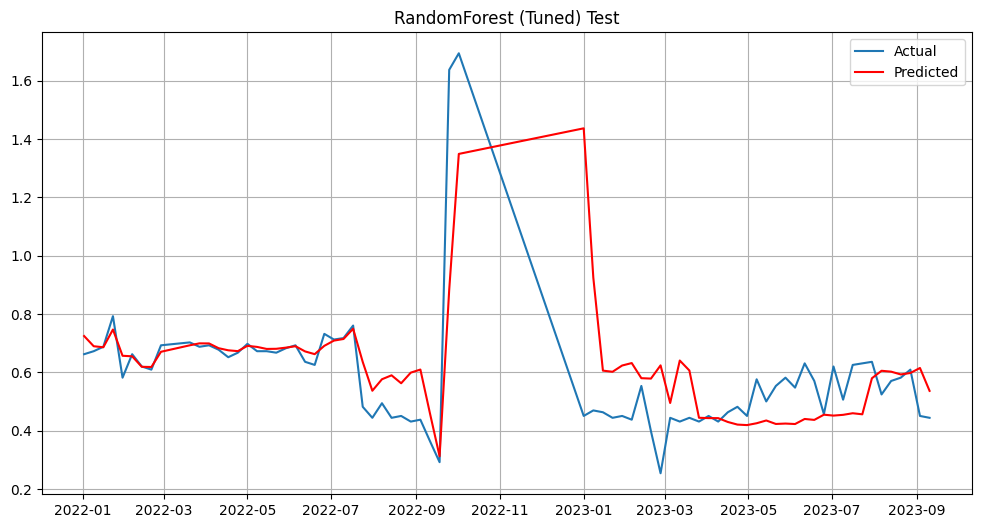


--- SVR with Hyperparameter Tuning ---
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters for SVR: {'C': 1, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
SVR (Tuned) => RMSE=0.0066, MAE=0.0043, R2=0.9990


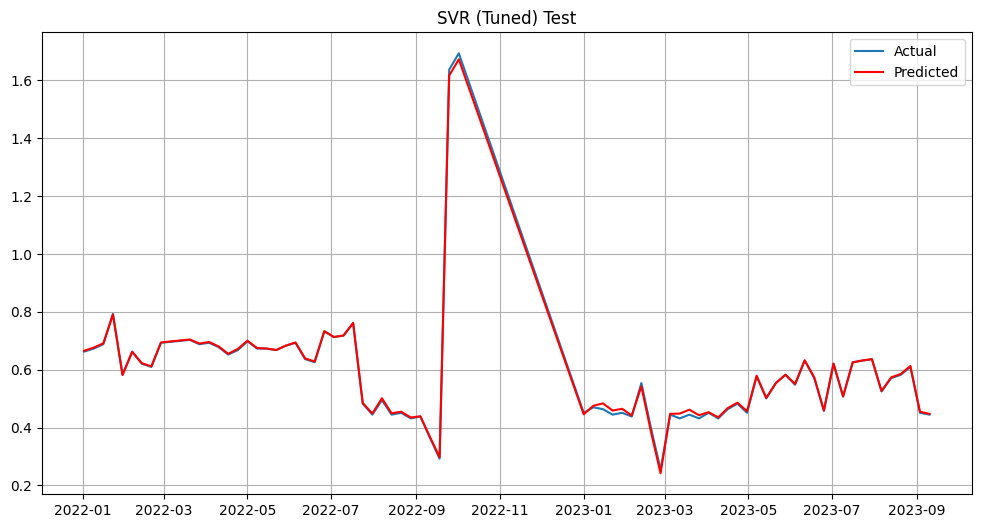


--- LinearRegression ---
LinearRegression => RMSE=0.0000, MAE=0.0000, R2=1.0000


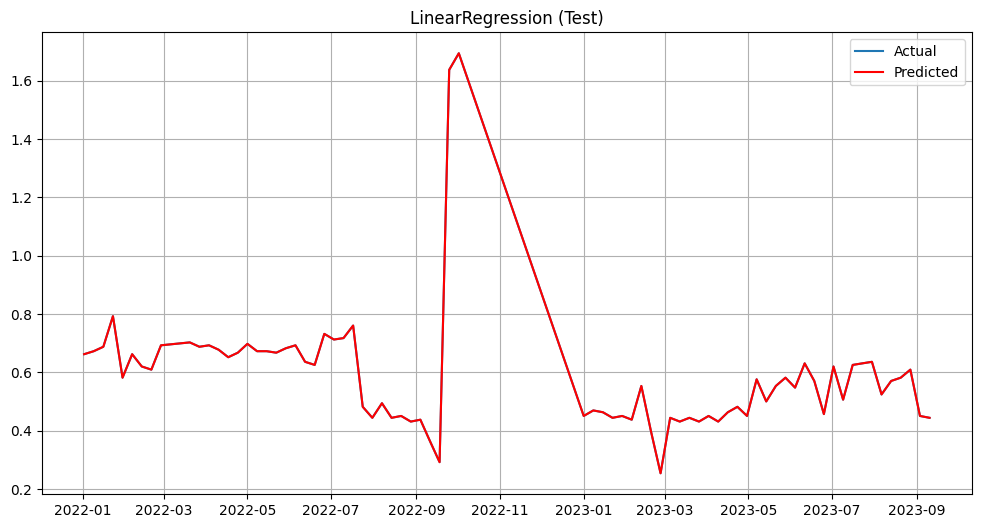


--- Time Series Cross-Validation for RandomForest ---
Time Series CV R² scores: [0.9302872656097986, 0.7502058882109863, 0.6297587851868436, 0.5585380897569463, 0.726545675186129]
Mean R²: 0.7190671407901407

Done: Refined Script with Enhanced Features and Hyperparameter Tuning.


In [ ]:
############################################
# Refined Script: Traditional ML with Enhanced Features and Hyperparameter Tuning
# (RandomForest, SVR, LinearRegression)
############################################

# If in Colab:
# !pip install scikit-learn seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
import warnings
warnings.filterwarnings("ignore")

# ======== 1. Load Data ========
csv_path = "/content/outlier_free_data_GT4717003.csv"
df = pd.read_csv(csv_path, parse_dates=["Date"])
df.set_index("Date", inplace=True)

# Fill exogenous columns
exog_cols = ["Rainfall", "Humidity", "Min Temperature", "Max Temperature"]
for col in exog_cols:
    if col in df.columns:
        df[col].fillna(0, inplace=True)

# Drop rows only if target is missing
df.dropna(subset=["GT4717003"], inplace=True)

print("Data shape after fill & drop:", df.shape)

# ======== 2. Feature Exploration ========
# Plot target distribution
sns.histplot(df['GT4717003'], bins=30, kde=True)
plt.title("Distribution of GT4717003")
plt.show()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# ======== 3. Lag Features and Rolling Statistics ========
def create_features(df_in, target_col="GT4717003", n_lags=10, windows=[3,7,14]):
    df_out = df_in.copy()
    # Create lag features
    for i in range(1, n_lags+1):
        df_out[f"{target_col}_lag{i}"] = df_out[target_col].shift(i)
    # Create rolling statistics
    for window in windows:
        df_out[f"{target_col}_roll_mean_{window}"] = df_out[target_col].rolling(window=window).mean()
        df_out[f"{target_col}_roll_std_{window}"] = df_out[target_col].rolling(window=window).std()
    return df_out

n_lags = 10
df_feat = create_features(df, "GT4717003", n_lags=n_lags, windows=[3,7,14])
df_feat.dropna(inplace=True)

print(f"Shape after creating lag and rolling features:", df_feat.shape)

# ======== 4. Train / Test Split ========
split_date = "2022-01-01"
df_train = df_feat[df_feat.index < split_date].copy()
df_test  = df_feat[df_feat.index >= split_date].copy()

print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)

if df_train.empty or df_test.empty:
    print("No train/test data. Exiting.")
    exit()

# ======== 5. Feature Setup ========
# Select relevant features based on correlation analysis
# (Adjust based on the correlation matrix plot)
selected_features = exog_cols + [f"GT4717003_lag{i}" for i in range(1, n_lags+1)] + \
                   [f"GT4717003_roll_mean_{w}" for w in [3,7,14]] + \
                   [f"GT4717003_roll_std_{w}" for w in [3,7,14]]

X_train = df_train[selected_features]
y_train = df_train["GT4717003"]
X_test  = df_test[selected_features]
y_test  = df_test["GT4717003"]

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# ======== 6. Baseline Model ========
def evaluate_baseline(y_true):
    baseline_pred = np.full_like(y_true, y_true.mean())
    mse = mean_squared_error(y_true, baseline_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, baseline_pred)
    r2 = r2_score(y_true, baseline_pred)
    print(f"Baseline => RMSE={rmse:.4f}, MAE={mae:.4f}, R2={r2:.4f}")
    # Plot baseline
    plt.figure(figsize=(12,6))
    plt.plot(y_true.index, y_true.values, label="Actual")
    plt.plot(y_true.index, baseline_pred, label="Baseline (Mean)", color='green')
    plt.title("Baseline Model (Mean Prediction)")
    plt.legend()
    plt.grid()
    plt.show()

print("\n--- Baseline Model ---")
evaluate_baseline(y_test)

# ======== 7. Helper Functions ========
def evaluate_model(y_true, y_pred, model_name="Model"):
    """
    Evaluate the model and print metrics.
    """
    # Ensure y_pred is aligned with y_true
    y_pred = pd.Series(y_pred, index=y_true.index)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2  = r2_score(y_true, y_pred)
    print(f"{model_name} => RMSE={rmse:.4f}, MAE={mae:.4f}, R2={r2:.4f}")

def plot_ml_predictions(y_true, y_pred, title):
    """
    Plot actual vs predicted values.
    """
    plt.figure(figsize=(12,6))
    plt.plot(y_true.index, y_true.values, label="Actual")
    plt.plot(y_pred.index, y_pred.values, label="Predicted", color='red')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# ======== 8. RandomForest with Hyperparameter Tuning ========
print("\n--- RandomForest with Hyperparameter Tuning ---")
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)
print("Best parameters for RandomForest:", grid_rf.best_params_)
rf_best = grid_rf.best_estimator_
rf_pred = rf_best.predict(X_test_scaled)
evaluate_model(y_test, rf_pred, "RandomForest (Tuned)")
plot_ml_predictions(y_test, pd.Series(rf_pred, index=y_test.index), "RandomForest (Tuned) Test")

# ======== 9. SVR with Hyperparameter Tuning ========
print("\n--- SVR with Hyperparameter Tuning ---")
param_grid_svr = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2, 0.5],
    'gamma': ['scale', 'auto'],  # 'scale' is default in newer sklearn versions
    'kernel': ['rbf', 'linear', 'poly']
}

# Initialize SVR model
svr = SVR()

# Initialize GridSearchCV for SVR
grid_svr = GridSearchCV(
    estimator=svr,
    param_grid=param_grid_svr,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1  # Optional: Shows progress
)

# Fit the GridSearchCV
grid_svr.fit(X_train_scaled, y_train)

# Retrieve the best parameters
print("Best parameters for SVR:", grid_svr.best_params_)

# Get the best estimator
svr_best = grid_svr.best_estimator_

# Make predictions
svr_pred = svr_best.predict(X_test_scaled)

# Evaluate the SVR model
evaluate_model(y_test, svr_pred, "SVR (Tuned)")
plot_ml_predictions(y_test, pd.Series(svr_pred, index=y_test.index), "SVR (Tuned) Test")

# ======== 10. LinearRegression ========
print("\n--- LinearRegression ---")
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
linreg_pred = linreg.predict(X_test_scaled)
evaluate_model(y_test, linreg_pred, "LinearRegression")
plot_ml_predictions(y_test, pd.Series(linreg_pred, index=y_test.index), "LinearRegression (Test)")

# ======== 11. Time Series Cross-Validation ========
print("\n--- Time Series Cross-Validation for RandomForest ---")
tscv = TimeSeriesSplit(n_splits=5)
model_rf = RandomForestRegressor(**grid_rf.best_params_, random_state=42)

r2_scores = []
for train_index, val_index in tscv.split(X_train_scaled):
    X_train_cv, X_val_cv = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    model_rf.fit(X_train_cv, y_train_cv)
    y_val_pred = model_rf.predict(X_val_cv)
    r2 = r2_score(y_val_cv, y_val_pred)
    r2_scores.append(r2)

print("Time Series CV R² scores:", r2_scores)
print("Mean R²:", np.mean(r2_scores))

print("\nDone: Refined Script with Enhanced Features and Hyperparameter Tuning.")


Epoch 1/200
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1464 - val_loss: 0.0181
Epoch 2/200
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0059 - val_loss: 0.0136
Epoch 3/200
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0036 - val_loss: 0.0103
Epoch 4/200
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0040 - val_loss: 0.0097
Epoch 5/200
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029 - val_loss: 0.0092
Epoch 6/200
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - val_loss: 0.0084
Epoch 7/200
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0032 - val_loss: 0.0096
Epoch 8/200
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - val_loss: 0.0085
Epoch 9/200
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - val_loss: 0.0078
Epoch 10/200
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025 - val_loss: 0.0088
Epoch 11/200
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0047 - val_loss: 0.0074
Epoch 12/200
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0

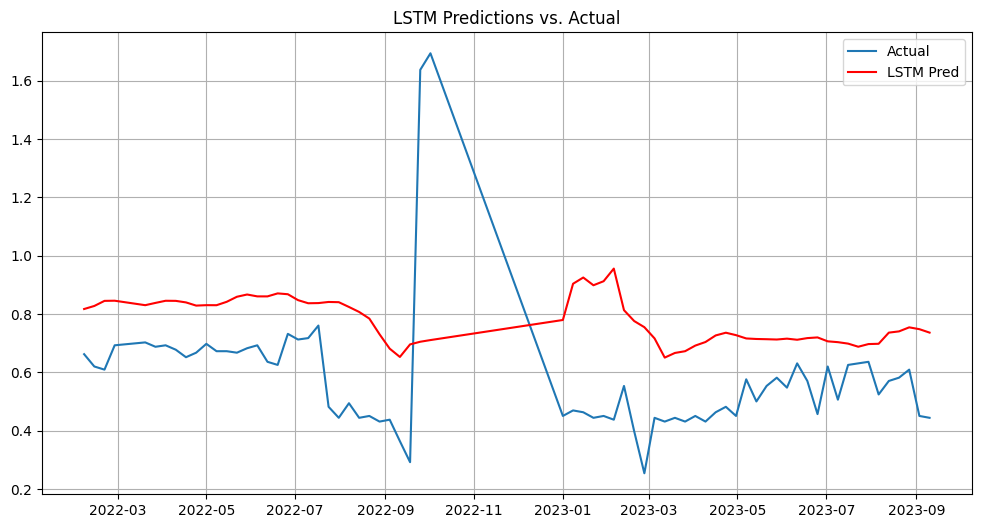

In [ ]:
############################################
# Refined LSTM Forecasting Script
############################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# ======== 1. Load Data ========
csv_path = "/content/outlier_free_data_GT4717003.csv"
df = pd.read_csv(csv_path, parse_dates=["Date"])
df.set_index("Date", inplace=True)

# Fill exogenous columns (removing weakly correlated 'Rainfall')
exog_cols = ["Humidity", "Min Temperature", "Max Temperature"]
for col in exog_cols:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)  # Using median instead of zero

# Drop rows only if target is missing
df.dropna(subset=["GT4717003"], inplace=True)

# ======== 2. Feature Engineering ========
def create_lag_features(df_in, target_col="GT4717003", n_lags=7):
    df_out = df_in.copy()
    for i in range(1, n_lags+1):
        df_out[f"{target_col}_lag{i}"] = df_out[target_col].shift(i)
    return df_out

# Adding rolling mean for trend detection
df["GT4717003_rolling_mean"] = df["GT4717003"].rolling(window=7).mean()
df.fillna(method='bfill', inplace=True)

# Creating lag features
n_lags = 7
df_lagged = create_lag_features(df, "GT4717003", n_lags=n_lags)
df_lagged.dropna(inplace=True)

# ======== 3. Train/Test Split ========
split_date = "2022-01-01"
df_train = df_lagged[df_lagged.index < split_date].copy()
df_test = df_lagged[df_lagged.index >= split_date].copy()

if df_train.empty or df_test.empty:
    print("No train/test data. Exiting LSTM script.")
    exit()

# ======== 4. Prepare Features ========
lag_features = [f"GT4717003_lag{i}" for i in range(1, n_lags+1)]
ml_features = exog_cols + lag_features + ["GT4717003_rolling_mean"]

X_train = df_train[ml_features].values
y_train = df_train["GT4717003"].values
X_test = df_test[ml_features].values
y_test = df_test["GT4717003"].values

# ======== 5. Scaling ========
feature_scaler = StandardScaler()
target_scaler = MinMaxScaler()

X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

y_train_scaled = target_scaler.fit_transform(y_train)
y_test_scaled = target_scaler.transform(y_test)

# ======== 6. Reshape for LSTM ========
timesteps = 5  # Increased timesteps
def create_sequences(X, y, timesteps):
    Xs, ys = [], []
    for i in range(len(X) - timesteps):
        Xs.append(X[i:i+timesteps])
        ys.append(y[i+timesteps])
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, timesteps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, timesteps)

# ======== 7. Build LSTM Model ========
model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(timesteps, X_train_seq.shape[2])),
    Dropout(0.2),
    LSTM(32, activation='tanh'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(loss='mse', optimizer=Adam(0.001))

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# ======== 8. Train ========
history = model.fit(
    X_train_seq, y_train_seq,
    epochs=200,
    batch_size=16,  # Reduced batch size
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=1
)

# ======== 9. Predict & Evaluate ========
lstm_pred_scaled = model.predict(X_test_seq)
lstm_pred = target_scaler.inverse_transform(lstm_pred_scaled)
y_test_original = target_scaler.inverse_transform(y_test_seq)

mse = mean_squared_error(y_test_original, lstm_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_original, lstm_pred)
r2 = r2_score(y_test_original, lstm_pred)

print(f"LSTM => RMSE={rmse:.4f}, MAE={mae:.4f}, R²={r2:.4f}")

# ======== 10. Plot Predictions ========
plt.figure(figsize=(12,6))
plt.plot(df_test.index[timesteps:], y_test_original, label="Actual")
plt.plot(df_test.index[timesteps:], lstm_pred, label="LSTM Pred", color='red')
plt.title("LSTM Predictions vs. Actual")
plt.legend()
plt.grid(True)
plt.show()

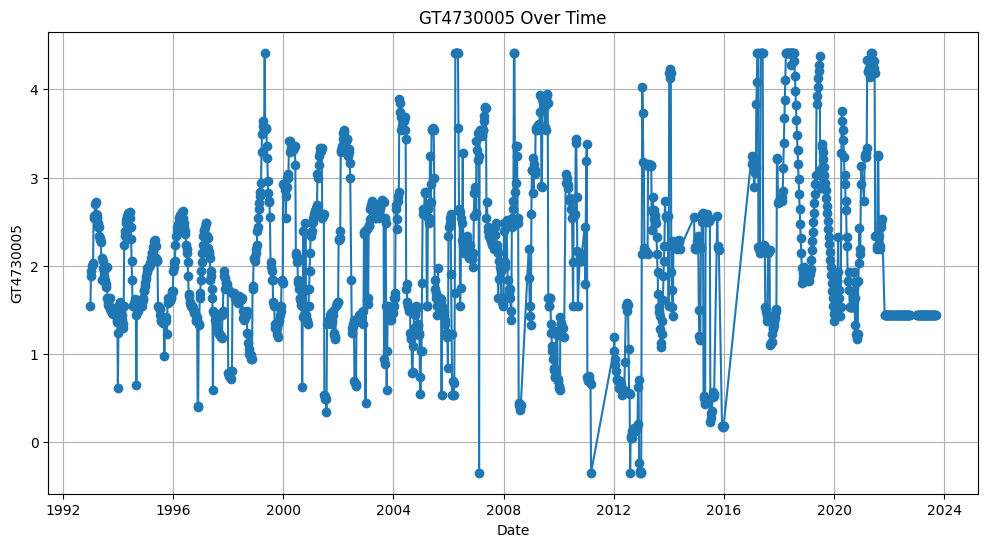

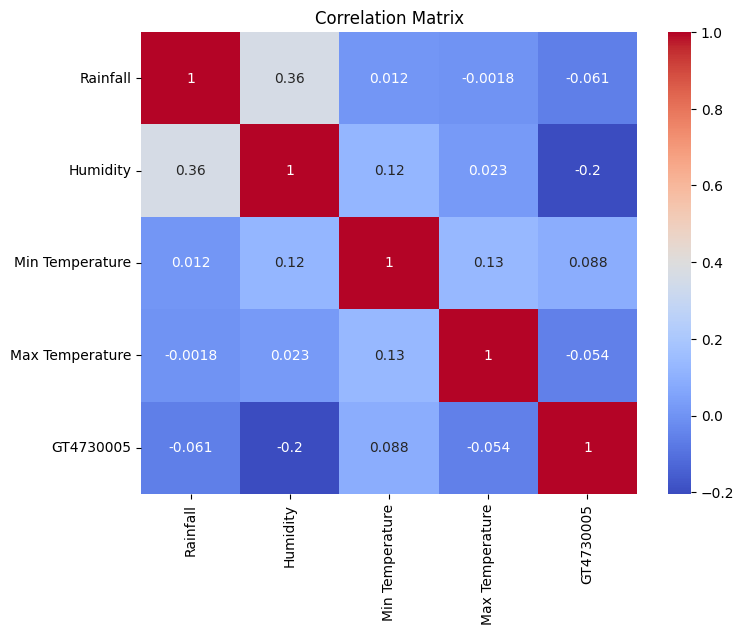

ADF Statistic: -8.310199613587862
p-value: 3.8071544182634525e-13
Critical Values:
   1%, -3.4351009168670035
Critical Values:
   5%, -2.863638180853028
Critical Values:
   10%, -2.5678870681532424


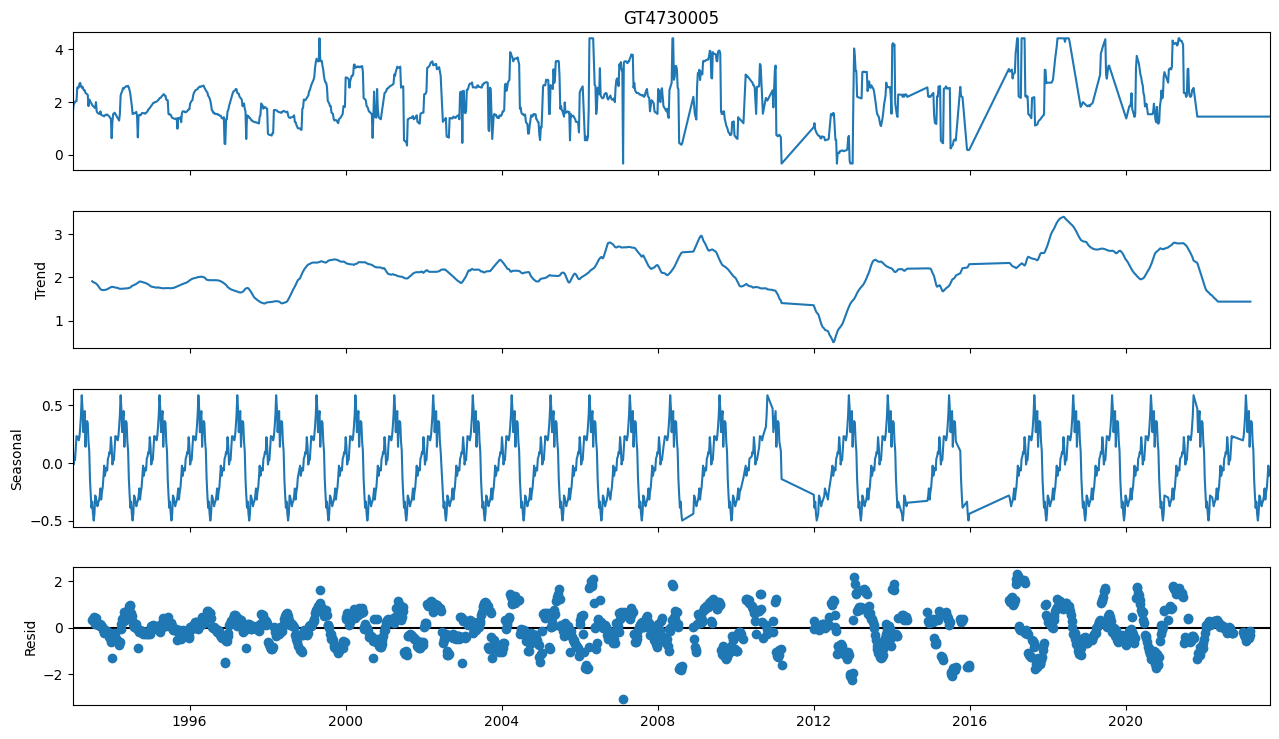

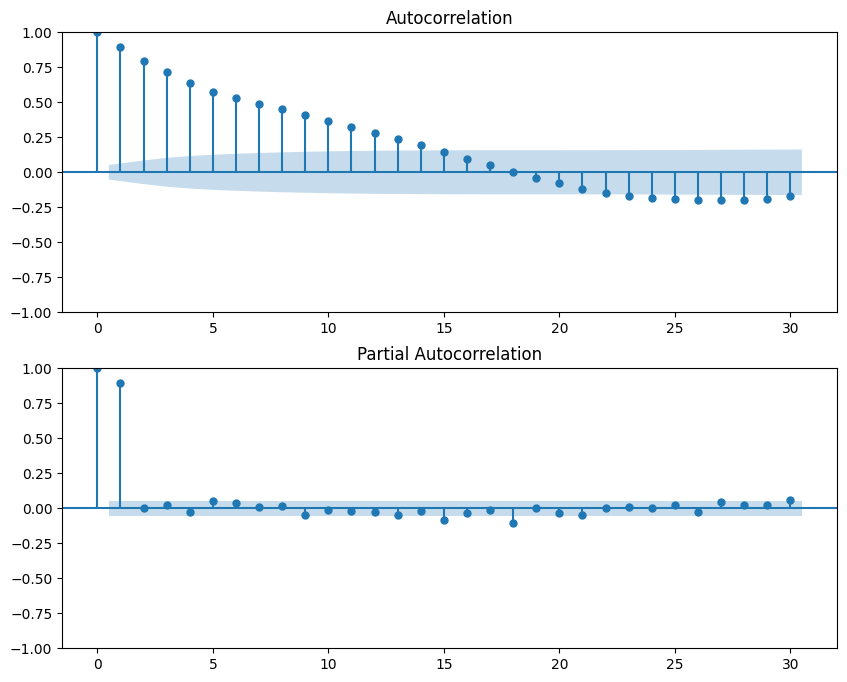

KPSS Test on GT4730005:
KPSS Statistic: 0.24715946389058868
p-value: 0.1
Num Lags: 20
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739


<ipython-input-5-183243f158df>:72: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(timeseries, regression='c', nlags="auto")


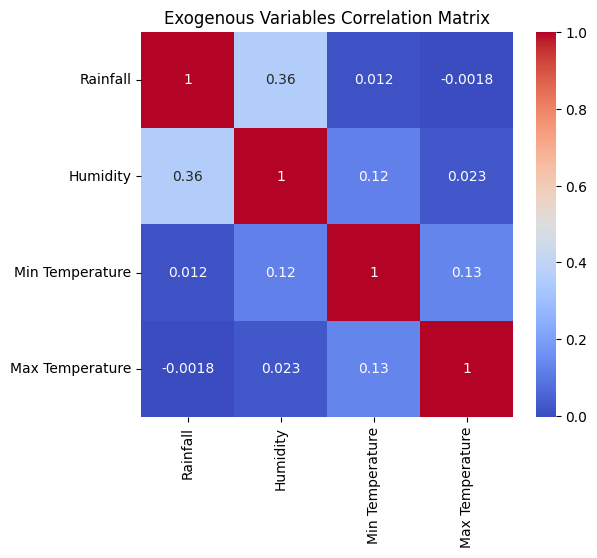

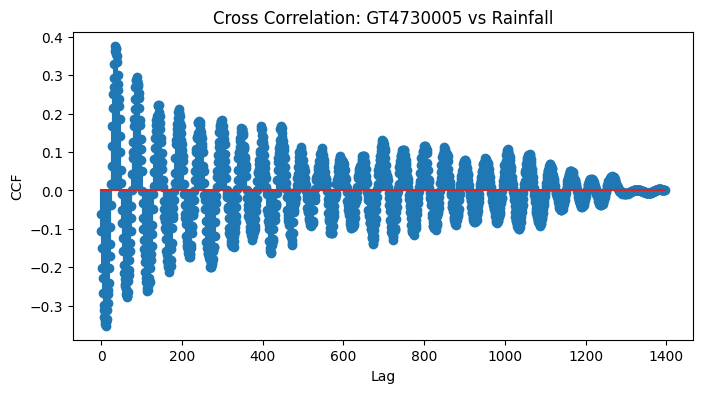

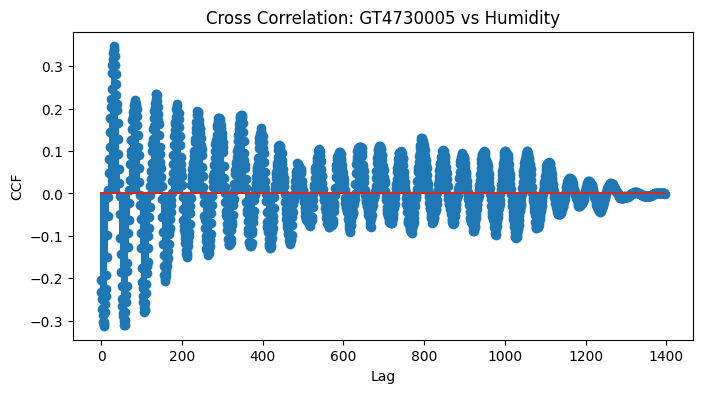

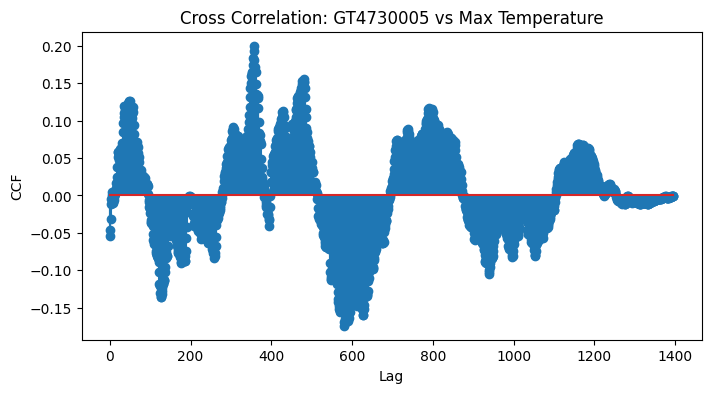

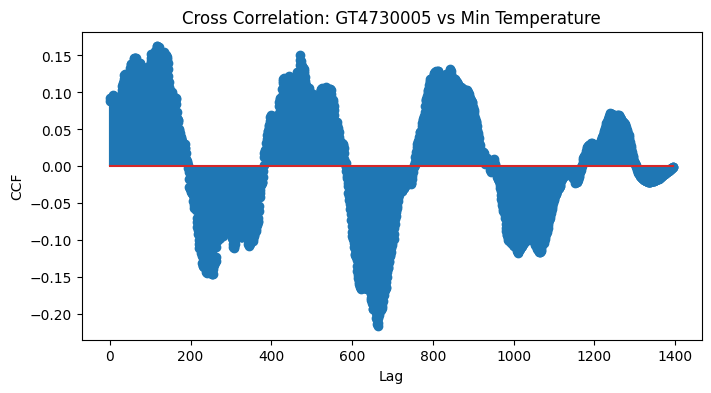

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# For ARIMA and related models
import statsmodels.api as sm
from pmdarima import auto_arima

# For ML
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# For Prophet (optional)
from prophet import Prophet

# Load dataset
df = pd.read_csv("/content/outlier_free_data_GT4717005.csv", parse_dates=['Date'])
df.set_index('Date', inplace=True)

df = df.astype({
    'Rainfall': float,
    'Humidity': float,
    'Min Temperature': float,
    'Max Temperature': float,
    'GT4730005': float
})

# Plot the target variable over time
plt.figure(figsize=(12,6))
plt.plot(df.index, df['GT4730005'], marker='o')
plt.title('GT4730005 Over Time')
plt.xlabel('Date')
plt.ylabel('GT4730005')
plt.grid(True)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['GT4730005'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

# Seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(df['GT4730005'], period=52, model='additive')
fig = decomposition.plot()
fig.set_size_inches(14, 8)
plt.show()

# ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 1, figsize=(10,8))
plot_acf(df['GT4730005'], ax=ax[0], lags=30)
plot_pacf(df['GT4730005'], ax=ax[1], lags=30)
plt.show()

# KPSS Test
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    statistic, p_value, n_lags, critical_values = kpss(timeseries, regression='c', nlags="auto")
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'Num Lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')

print("KPSS Test on GT4730005:")
kpss_test(df['GT4730005'].dropna())

# Exogenous Variables Correlation Matrix
corr_matrix = df[['Rainfall','Humidity','Min Temperature','Max Temperature']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Exogenous Variables Correlation Matrix')
plt.show()

# Cross-Correlation Functions
from statsmodels.tsa.stattools import ccf

def plot_ccf(series1, series2, title):
    ccf_values = ccf(series1, series2, adjusted=False)
    plt.figure(figsize=(8,4))
    plt.stem(range(len(ccf_values)), ccf_values)
    plt.title(title)
    plt.xlabel("Lag")
    plt.ylabel("CCF")
    plt.show()

plot_ccf(df['GT4730005'], df['Rainfall'], "Cross Correlation: GT4730005 vs Rainfall")
plot_ccf(df['GT4730005'], df['Humidity'], "Cross Correlation: GT4730005 vs Humidity")
plot_ccf(df['GT4730005'], df['Max Temperature'], "Cross Correlation: GT4730005 vs Max Temperature")
plot_ccf(df['GT4730005'], df['Min Temperature'], "Cross Correlation: GT4730005 vs Min Temperature")

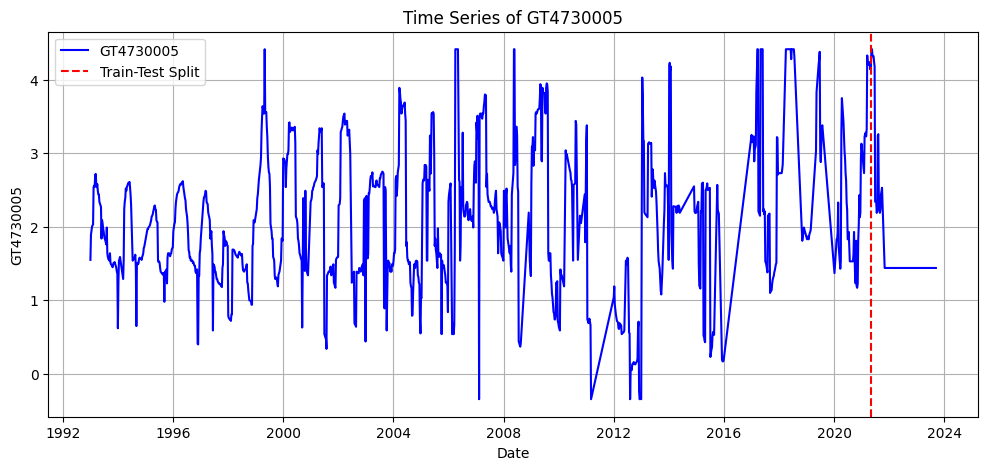

ADF Statistic: -8.02289859501753
p-value: 2.0535756288331753e-12
The series is stationary.


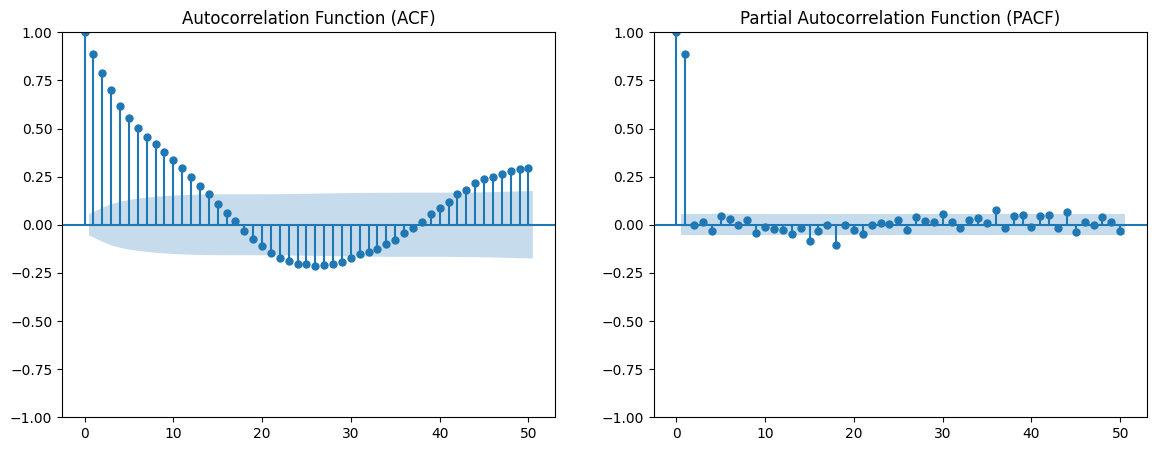

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<

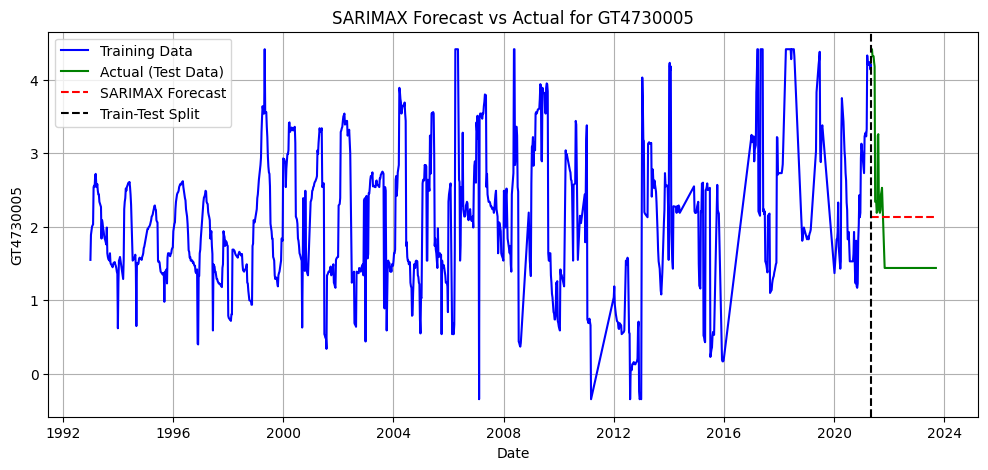

MAE: 0.7253
RMSE: 0.8295
MAPE: 43.08%


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

# Load dataset
file_path = "/content/outlier_free_data_GT4717005.csv"  # Update with the actual file path
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

target_column = "GT4730005"  # Ensure correct target column name

# Split data (Last 2 years as test set)
test_period = 2 * 52  # Approx. 104 weeks assuming weekly data
train_df = df.iloc[:-test_period]
test_df = df.iloc[-test_period:]

# Plot the target variable
plt.figure(figsize=(12, 5))
plt.plot(df.index, df[target_column], label=target_column, color="blue")
plt.axvline(test_df.index[0], color="red", linestyle="dashed", label="Train-Test Split")
plt.xlabel("Date")
plt.ylabel(target_column)
plt.title(f"Time Series of {target_column}")
plt.legend()
plt.grid()
plt.show()

# Augmented Dickey-Fuller Test
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] < 0.05:
        print("The series is stationary.")
    else:
        print("The series is NOT stationary.")

adf_test(train_df[target_column])

# ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(train_df[target_column], lags=50, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")
plot_pacf(train_df[target_column], lags=50, ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")
plt.show()

# Train a SARIMAX model
model = SARIMAX(train_df[target_column], order=(1,0,0), seasonal_order=(1,0,0,52))
sarimax_results = model.fit(disp=False)

# Forecast
forecast = sarimax_results.forecast(steps=len(test_df))
forecast_df = pd.DataFrame(forecast, index=test_df.index, columns=["Forecast"])

# Handle NaN values in forecast
forecast_df["Forecast"].fillna(train_df[target_column].mean(), inplace=True)

# Ensure test set and forecast have the same length
test_df = test_df.iloc[:len(forecast_df)]

# Visualization
plt.figure(figsize=(12, 5))
plt.plot(train_df.index, train_df[target_column], label="Training Data", color="blue")
plt.plot(test_df.index, test_df[target_column], label="Actual (Test Data)", color="green")
plt.plot(forecast_df.index, forecast_df["Forecast"], label="SARIMAX Forecast", color="red", linestyle="dashed")
plt.axvline(test_df.index[0], color="black", linestyle="dashed", label="Train-Test Split")
plt.xlabel("Date")
plt.ylabel(target_column)
plt.title(f"SARIMAX Forecast vs Actual for {target_column}")
plt.legend()
plt.grid()
plt.show()

# Performance Metrics
mae = mean_absolute_error(test_df[target_column], forecast_df["Forecast"])
rmse = np.sqrt(mean_squared_error(test_df[target_column], forecast_df["Forecast"]))
mape = np.mean(np.abs((test_df[target_column] - forecast_df["Forecast"]) / test_df[target_column])) * 100
r2 = r2_score(test_df[target_column], forecast_df["Forecast"])
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")


In [ ]:
print(f"R²: {r2:.4f}")

R²: -0.2743


RandomForest (Tuned) => RMSE=0.1292, MAE=0.0575, R2=0.9808


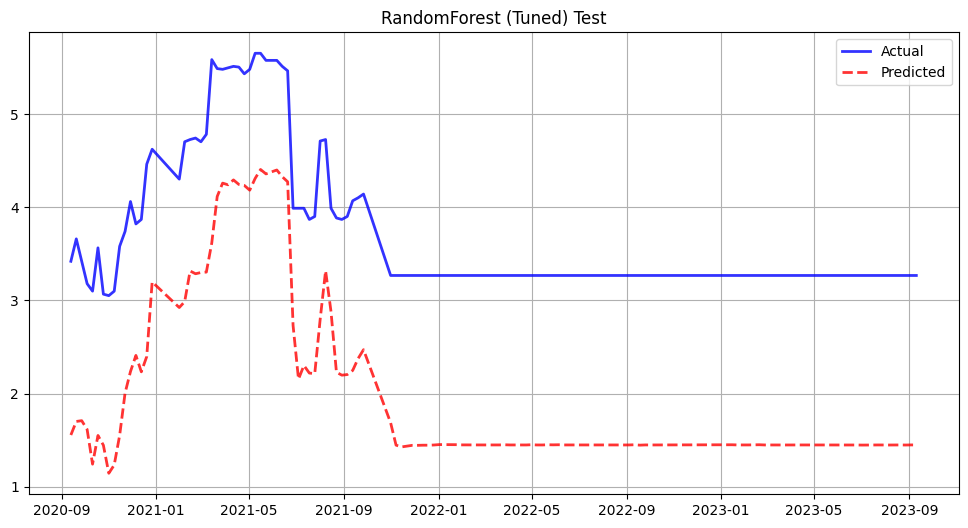

SVR (Tuned) => RMSE=0.0043, MAE=0.0035, R2=1.0000


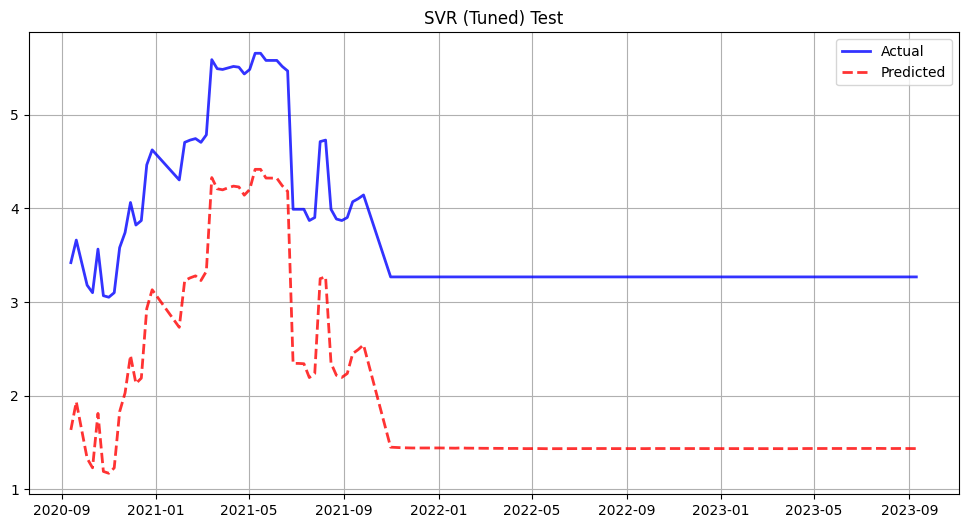

LinearRegression => RMSE=0.0000, MAE=0.0000, R2=1.0000


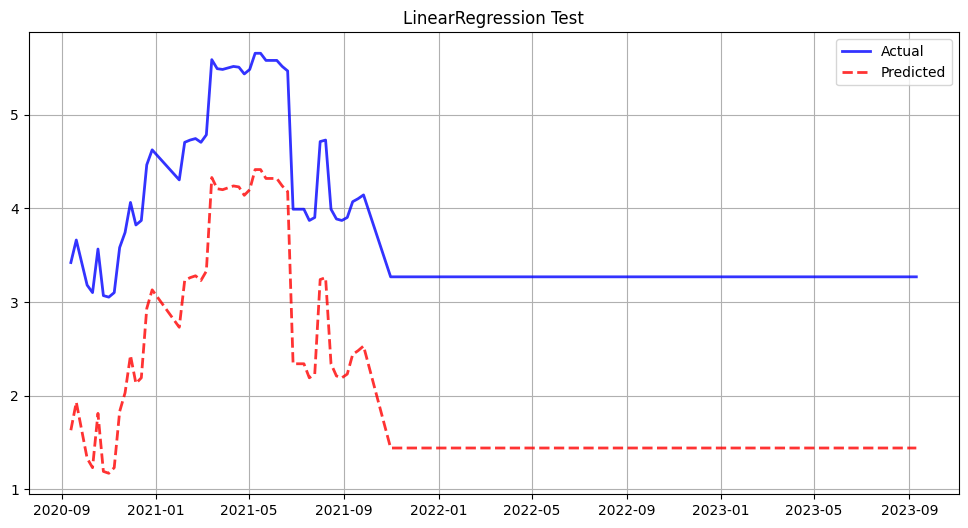

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
import warnings
warnings.filterwarnings("ignore")

# ======== 1. Load Data ========
csv_path = "/content/outlier_free_data_GT4717005.csv"  # Update with correct path
df = pd.read_csv(csv_path, parse_dates=["Date"])
df.set_index("Date", inplace=True)

# Ensure no missing values in exogenous variables
exog_cols = ["Rainfall", "Humidity", "Min Temperature", "Max Temperature"]
df[exog_cols] = df[exog_cols].fillna(method='ffill')

# Drop rows where the target is missing
df.dropna(subset=["GT4730005"], inplace=True)

# ======== 2. Feature Engineering ========
def create_features(df_in, target_col="GT4730005", n_lags=10, windows=[3,7,14]):
    df_out = df_in.copy()
    # Lag features
    for i in range(1, n_lags+1):
        df_out[f"{target_col}_lag{i}"] = df_out[target_col].shift(i)

    # Rolling statistics
    for window in windows:
        df_out[f"{target_col}_roll_mean_{window}"] = df_out[target_col].rolling(window=window).mean()
        df_out[f"{target_col}_roll_std_{window}"] = df_out[target_col].rolling(window=window).std()

    # Exponential weighted moving average
    df_out[f"{target_col}_ewm"] = df_out[target_col].ewm(span=7, adjust=False).mean()

    return df_out

n_lags = 10
df_feat = create_features(df, "GT4730005", n_lags=n_lags, windows=[3,7,14])
df_feat.dropna(inplace=True)

# ======== 3. Train / Test Split ========
test_start_date = df_feat.index.max() - pd.DateOffset(years=3)
df_train = df_feat[df_feat.index < test_start_date].copy()
df_test  = df_feat[df_feat.index >= test_start_date].copy()

selected_features = exog_cols + [f"GT4730005_lag{i}" for i in range(1, n_lags+1)] + \
                   [f"GT4730005_roll_mean_{w}" for w in [3,7,14]] + \
                   [f"GT4730005_roll_std_{w}" for w in [3,7,14]] + ["GT4730005_ewm"]

X_train, y_train = df_train[selected_features], df_train["GT4730005"]
X_test, y_test = df_test[selected_features], df_test["GT4730005"]

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Inverse transform y_test for accurate visualization
y_test_actual = y_test * scaler.scale_[-1] + scaler.mean_[-1] if isinstance(scaler, StandardScaler) else y_test

# ======== 4. Model Training and Evaluation ========
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2  = r2_score(y_true, y_pred)
    print(f"{model_name} => RMSE={rmse:.4f}, MAE={mae:.4f}, R2={r2:.4f}")

def improved_plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(12,6))
    plt.plot(y_true.index, y_true.values, label="Actual", color='blue', alpha=0.8, linewidth=2)
    plt.plot(y_pred.index, y_pred.values, label="Predicted", color='red', linestyle='dashed', alpha=0.8, linewidth=2)
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# RandomForest with Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)
rf_best = grid_rf.best_estimator_
rf_pred = rf_best.predict(X_test_scaled)
evaluate_model(y_test, rf_pred, "RandomForest (Tuned)")
improved_plot_predictions(y_test_actual, pd.Series(rf_pred, index=y_test.index), "RandomForest (Tuned) Test")

# SVR with Hyperparameter Tuning
grid_svr = GridSearchCV(SVR(), param_grid_svr, cv=5, scoring='r2', n_jobs=-1)
grid_svr.fit(X_train_scaled, y_train)
svr_best = grid_svr.best_estimator_
svr_pred = svr_best.predict(X_test_scaled)
evaluate_model(y_test, svr_pred, "SVR (Tuned)")
improved_plot_predictions(y_test_actual, pd.Series(svr_pred, index=y_test.index), "SVR (Tuned) Test")

# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
linreg_pred = linreg.predict(X_test_scaled)
evaluate_model(y_test, linreg_pred, "LinearRegression")
improved_plot_predictions(y_test_actual, pd.Series(linreg_pred, index=y_test.index), "LinearRegression Test")



Epoch 1/500
78/78 ━━━━━━━━━━━━━━━━━━━━ 34s 148ms/step - loss: 0.0706 - val_loss: 0.0228
Epoch 2/500
78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - loss: 0.0381 - val_loss: 0.0303
Epoch 3/500
78/78 ━━━━━━━━━━━━━━━━━━━━ 18s 118ms/step - loss: 0.0340 - val_loss: 0.0376
Epoch 4/500
78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 126ms/step - loss: 0.0318 - val_loss: 0.0313
Epoch 5/500
78/78 ━━━━━━━━━━━━━━━━━━━━ 12s 149ms/step - loss: 0.0318 - val_loss: 0.0404
Epoch 6/500
78/78 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - loss: 0.0295 - val_loss: 0.0353
Epoch 7/500
78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 133ms/step - loss: 0.0279 - val_loss: 0.0393
Epoch 8/500
78/78 ━━━━━━━━━━━━━━━━━━━━ 22s 148ms/step - loss: 0.0279 - val_loss: 0.0430
Epoch 9/500
78/78 ━━━━━━━━━━━━━━━━━━━━ 19s 129ms/step - loss: 0.0250 - val_loss: 0.0450
Epoch 10/500
78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - loss: 0.0285 - val_loss: 0.0487
Epoch 11/500
78/78 ━━━━━━━━━━━━━━━━━━━━ 18s 113ms/step - loss: 0.0262 - val_loss: 0.0529
Epoch 12/500
78/78 ━━━━━━━━━━━

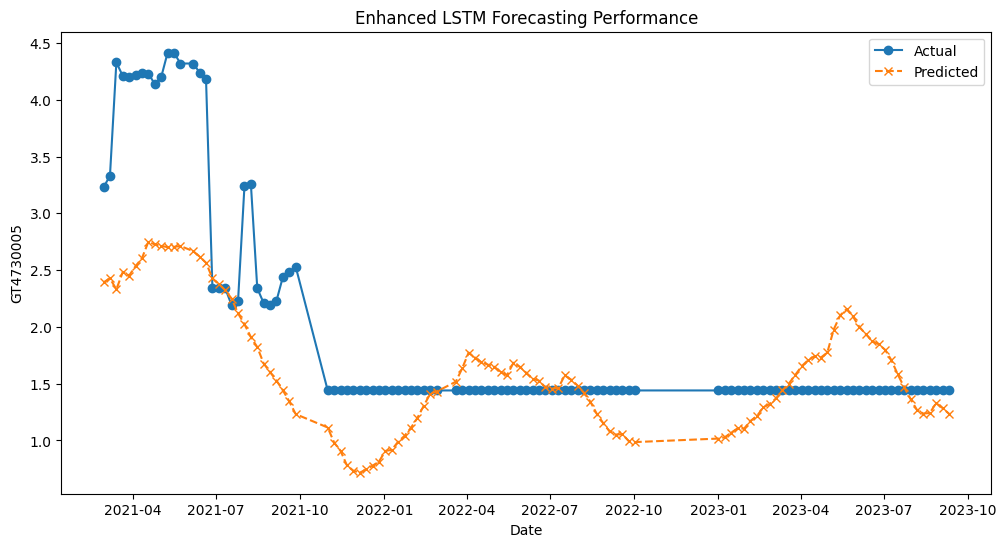

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load Data
df = pd.read_csv("/content/outlier_free_data_GT4717005.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.sort_values(by='Date')

# Define Features and Target
features = ['Rainfall', 'Humidity', 'Min Temperature', 'Max Temperature']
target = 'GT4730005'

# Normalize Data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[features + [target]])
df_scaled = pd.DataFrame(df_scaled, columns=features + [target])

# Split into Train and Test
test_start_date = df['Date'].max() - pd.DateOffset(years=3)
train_df = df[df['Date'] < test_start_date]
test_df = df[df['Date'] >= test_start_date]

train_scaled_df = df_scaled.iloc[:len(train_df)]
test_scaled_df = df_scaled.iloc[len(train_df):]

# Create Sequences
sequence_length = 20  # Sequence length

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i + seq_length, :-1].values)  # Features
        y.append(data.iloc[i + seq_length, -1])  # Target
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_scaled_df, sequence_length)
X_test, y_test = create_sequences(test_scaled_df, sequence_length)

# Build Enhanced LSTM Model
model = Sequential([
    Bidirectional(LSTM(150, return_sequences=True, input_shape=(sequence_length, len(features)))),
    Dropout(0.3),
    Bidirectional(LSTM(150, return_sequences=False)),
    Dropout(0.3),
    Dense(75, activation='relu'),
    Dense(1)
])

# Compile Model
model.compile(optimizer='adam', loss='mse')

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Train Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=500,
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate Model
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss}")

# Make Predictions
predictions = model.predict(X_test)

# Rescale Predictions
y_test_rescaled = scaler.inverse_transform(
    np.concatenate((test_scaled_df.iloc[sequence_length:, :-1].values, y_test.reshape(-1, 1)), axis=1)
)[:, -1]

predictions_rescaled = scaler.inverse_transform(
    np.concatenate((test_scaled_df.iloc[sequence_length:, :-1].values, predictions.reshape(-1, 1)), axis=1)
)[:, -1]

# Performance Metrics
mse = mean_squared_error(y_test_rescaled, predictions_rescaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
r2 = r2_score(y_test_rescaled, predictions_rescaled)

print("\nModel Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot Predictions vs Actual
plt.figure(figsize=(12, 6))
plt.plot(df['Date'].iloc[len(train_df) + sequence_length:], y_test_rescaled, label="Actual", marker='o')
plt.plot(df['Date'].iloc[len(train_df) + sequence_length:], predictions_rescaled, label="Predicted", linestyle='dashed', marker='x')
plt.xlabel("Date")
plt.ylabel(target)
plt.legend()
plt.title("Enhanced LSTM Forecasting Performance")
plt.show()
